In [ ]:
import sys
import pandas as pd
import numpy as np
import setuptools
import conda
!pip install datascience
from datascience import *
!pip install matplotlib
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# The Initial Database

In [1072]:
Sat_Table = Table().read_table("UCS-Satellite-Database-1-1-2022.csv")
Sat_Table.show(10)

"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 28,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
1HOPSAT-TD (1st-generation High Optical Performance Sate ...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0,566,576,0.000720357,36.9,96.08,22,nan,nan,12/11/2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation constellation.,nan,JMSatcat/3_20,https://spaceflightnow.com/2019/12/11/indias-50th-pslv-l ...,https://www.herasys.com/,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,nan,LEO,Sun-Synchronous,0,497,517,0.00145,97.45,94.7,5,nan,4.5,6/23/2017,2,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,nan,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/satellite-mi ...,nan,http://www.planet4589.org/space/log/satcat.txt,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0,442,687,0.0177,98.2,95.9,1,nan,nan,4/25/2016,nan,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460,Carries AIS system.,nan,Space50,http://spaceflightnow.com/2016/04/26/soyuz-blasts-off-wi ...,nan,http://space50.org/objekt.php?mot=2016-025E&jazyk=pp_en,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,75,"35,778","35,793",0.000178,0.08,1436.03,"6,330",nan,"16,000",2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transponders. $214 ...",nan,ZARYA,http://www.absatellite.net/satellite-fleet/?sat=abs6,nan,http://www.zarya.info/Diaries/Launches/Launches.php?year ...,http://www.absatellite.net/2010/10/13/asia-broadcast-sat ...,http://www.spacenews.com/article/satellite-telecom/42218 ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-75,"35,700","35,700",0,0,1436.1,"1,800",nan,nan,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,nan,nan,Estimated,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABS-3A,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-3,"35,788","35,803",0.000178,0.1,1436,"2,000",nan,nan,3/2/2015,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.,na

# International Space Development: Lay of the Land

## This analysis includes dashbaords describing:


###   · Capabilities Possessed (including those commercially operated, unless otherwise stated)

###   · Trends in Capability Acquisition

# Five Eyes 

#### Sapce X contributes 1,815 communication-based satellites to this dataset as an extreme outlier (and heavily skews visualizations; so, for all intensive purposes this data point will be excluded from analysis, but acknowledged as a major producer of communication-based satellites)

Country of Operator/Owner,Earth Observation/Technology Development,Earth Science,Navigation/Global Positioning,Space Observation,Surveillance,Technology Demonstration,Technology Development,Communication,Earth Observation,Space Science
Australia,0,0,0,0,0,0,6,8,0,0
Canada,0,4,0,2,0,0,4,33,5,3
New Zealand,0,0,0,0,0,0,1,0,0,0
USA,2,5,35,5,9,17,122,429,444,34
USA/Canada,0,0,0,0,0,0,0,2,0,0
United Kingdom,0,0,0,0,0,0,6,436,6,1


General Capability Numbers


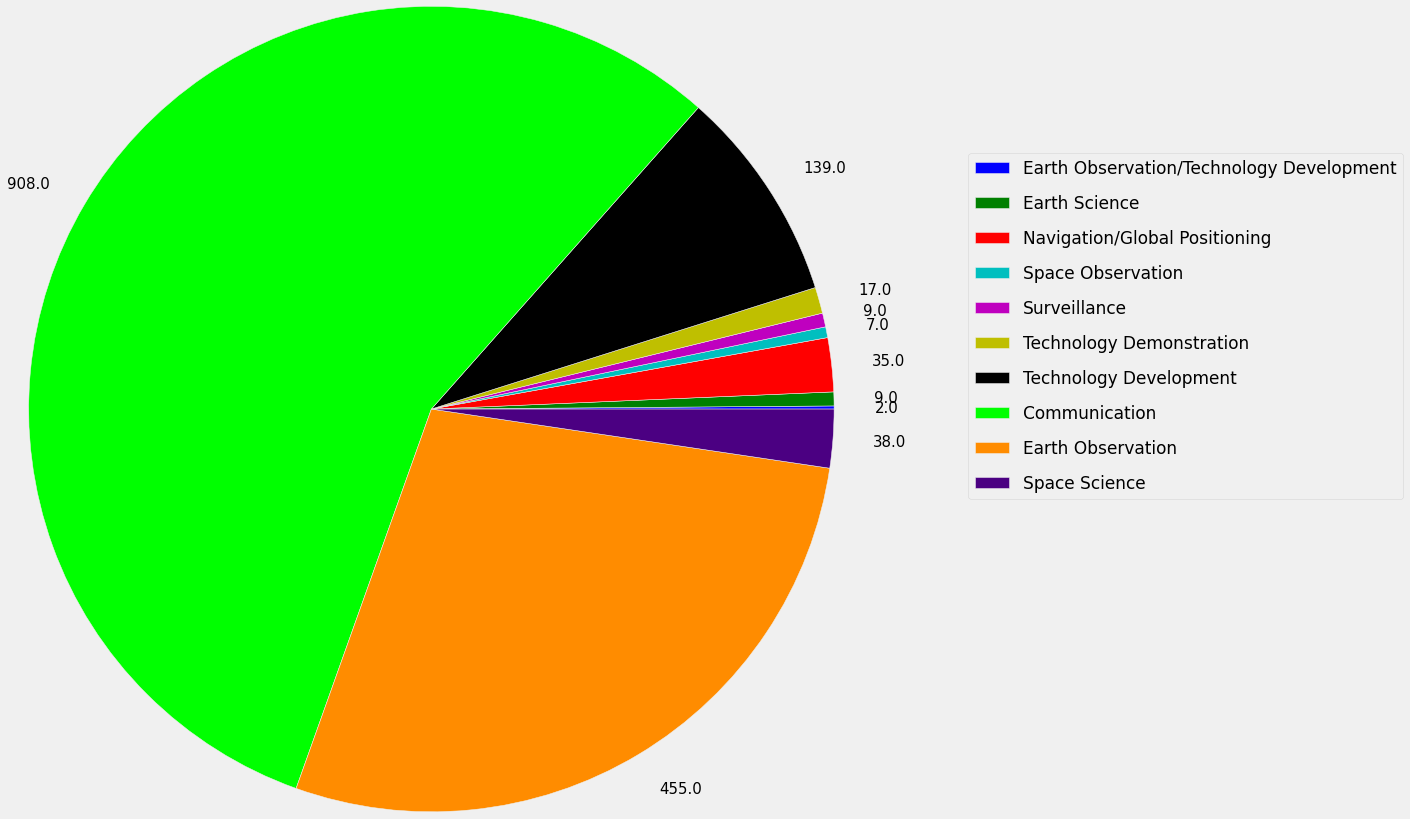

In [1231]:
Five_Eyes = Master_Table.where("Country of Operator/Owner", are.contained_in(five_eyes_plus_2)).where("Contractor", are.not_containing("SpaceX")).pivot("Purpose", "Country of Operator/Owner")
Five_Eyes = Five_Eyes.drop(1,2,4,5,19).with_columns("Communication", make_array(8,33,0,429,2,436), "Earth Observation", make_array(0,5,0,444,0,6))
Five_Eyes = Five_Eyes.drop("Communications/Maritime Tracking", "Educational", "Platform", "Space Science", "Space Science/Technology Demonstration").with_columns("Space Science", make_array(0,3,0,34,0,1)).drop("Mission Extension Technology", "Satellite Positioning")
Five_Eyes.show()

new_vals = make_array()
for i in Five_Eyes.drop(0).labels:
    stat = sum(Five_Eyes.column(i))
    new_vals = np.append(new_vals, stat)
    
print("General Capability Numbers")
    
caps = plots.pie(x=new_vals, labels = new_vals, textprops={'fontsize': 15}, radius=3.8, colors = make_array('b','g','r','c','m','y','k','lime','darkorange','indigo'))
leg = plots.legend(labels = Five_Eyes.drop("Country of Operator/Owner").labels, loc='upper right', bbox_to_anchor = (4.2,1.5),labelspacing = 1, fontsize = 17)


Major Areas of Development


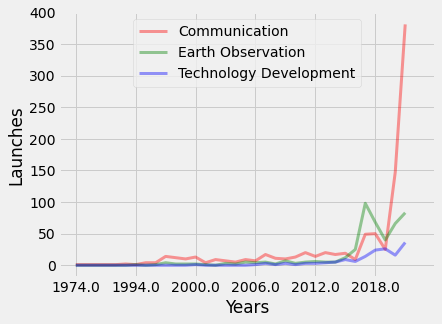

In [1230]:
PLOT = Master_Table_Dates.where("Country of Operator/Owner", are.contained_in(five_eyes_plus_2)).where("Contractor", are.not_containing("SpaceX")).pivot("Purpose", "Date of Launch")

vals_1 = PLOT.column(1) + PLOT.column(2)
vals_2 = PLOT.column(4) + PLOT.column(5) + PLOT.column(6)
vals_3 = PLOT.column(17) + PLOT.column(18)

time = PLOT.column(0)
overlapping = 0.40

print("Major Areas of Development")
line1 = plots.plot(time, vals_1, c='red', alpha=overlapping, lw=3, label = 'Communication')
line2 = plots.plot(time, vals_2, c='green',label = 'Earth Observation', alpha=overlapping, lw=3)
line3 = plots.plot(time, vals_3, c='blue',label = 'Technology Development', alpha=overlapping, lw=3)
sets = plots.xticks(range(0,40,6)) 
xlab = plots.xlabel("Years") 
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)


Other Areas of Development


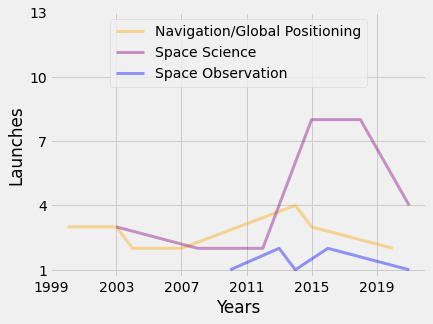

In [1160]:
dates = make_array(1974)
for i in np.arange(1988, 1992, 1):
    dates = np.append(dates, i)
for i in np.arange(1993, 2022, 1):
    dates = np.append(dates, i)    

PLOTS = PLOT.drop("Date of Launch").with_columns("Date of Launch", dates)
PLOTS = PLOTS.where("Date of Launch", are.above(1999))


vals_4 = PLOTS.where("Navigation/Global Positioning", are.above(1)).column("Navigation/Global Positioning")
dates_4 = PLOTS.where("Navigation/Global Positioning", are.above(1)).column("Date of Launch")
vals_5 = PLOTS.where("Space Science", are.above(1)).column("Space Science")
dates_5 = PLOTS.where("Space Science", are.above(1)).column("Date of Launch")
vals_6 = PLOTS.where("Space Observation", are.not_equal_to(0)).column("Space Observation")
dates_6 = PLOTS.where("Space Observation", are.not_equal_to(0)).column("Date of Launch")

time = PLOTS.column("Date of Launch")
overlapping = 0.40

print("Other Areas of Development")
line1 = plots.plot(dates_4, vals_4, c='orange', alpha=overlapping, lw=3, label = 'Navigation/Global Positioning')
line2 = plots.plot(dates_5, vals_5, c='purple',label = 'Space Science', alpha=overlapping, lw=3)
line3 = plots.plot(dates_6, vals_6, c='blue',label = 'Space Observation', alpha=overlapping, lw=3) 
xran = plots.xticks(range(1999, 2021, 4))
yran = plots.yticks(range(1, 15, 3))
xlab = plots.xlabel("Years")
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)

# EUCOM

Country of Operator/Owner,Earth Science,Signals Intelligence,Space Science,Technology Demonstration,Communication,Earth Observation,Technology Development
Denmark,0,0,0,0,0,2,2
France,1,0,0,1,3,14,2
France/Italy,0,0,0,0,2,1,0
France/Italy/Belgium/Spain/Greece,0,0,0,0,0,2,0
Germany,1,0,2,10,3,10,18
Italy,0,0,0,1,3,8,2
Luxembourg,0,0,0,0,33,8,0
Morocco/Germany,0,0,0,0,0,0,1
Netherlands,0,1,0,0,8,0,6
Norway,0,0,0,0,5,3,0


General Capability Numbers


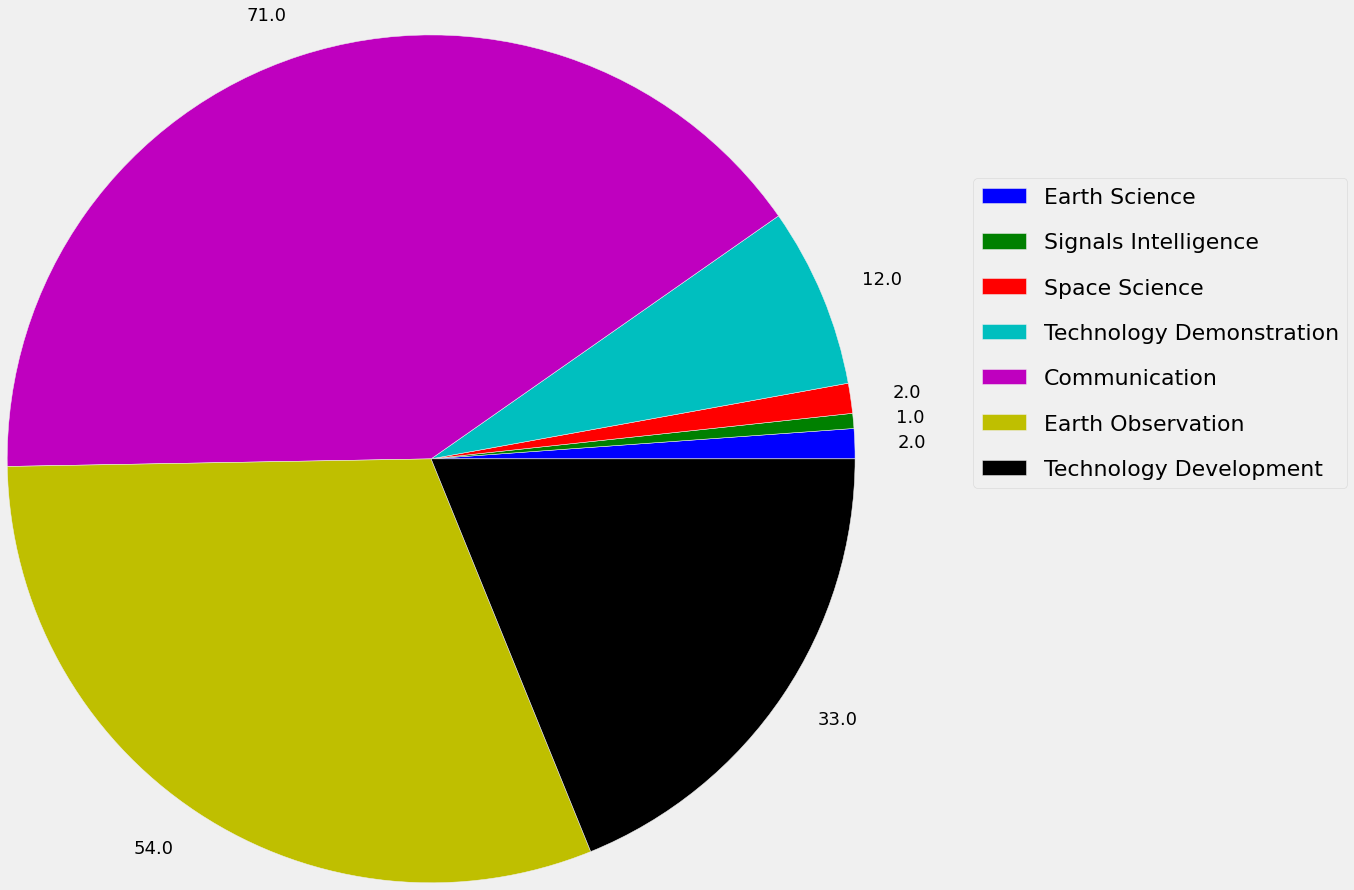

In [1238]:
eucom = make_array("Norway", "Germany", "France", "Italy", "Luxembourg", "Spain", "Denmark", "Netherlands")

eucom_arr = make_array()
for i in eucom:
    col = Master_Table.where("Country of Operator/Owner", are.containing(i)).column("Country of Operator/Owner")
    for k in col:
        eucom_arr = np.append(eucom_arr, k)
        
eucom_arr

EUCOM = Master_Table.where("Country of Operator/Owner", are.contained_in(eucom_arr)).where("Country of Operator/Owner", are.not_containing("USA")).where("Country of Operator/Owner", are.not_containing("China")).where("Country of Operator/Owner", are.not_containing("Sweden")).where("Country of Operator/Owner", are.not_containing("United Kingdom")).where("Country of Operator/Owner", are.not_containing("India")).where("Country of Operator/Owner", are.not_containing("Israel"))
                                                                                    
EUCOM = EUCOM.pivot("Purpose", "Country of Operator/Owner")


comms = EUCOM.column(1) + EUCOM.column(2)
earth_obs = EUCOM.column(3) + EUCOM.column(4) + EUCOM.column(5) + EUCOM.column(7)
tech_dev = EUCOM.column(13) + EUCOM.column(12) + EUCOM.column(10)

EUCOM = EUCOM.drop(1,2,3,4,5,7,10,12,13).with_columns("Communication", comms, "Earth Observation", earth_obs, "Technology Development", tech_dev)
EUCOM.show()

new_values = make_array()
for i in EUCOM.drop(0).labels:
    stat = sum(EUCOM.column(i))
    new_values = np.append(new_values, stat)
print("General Capability Numbers")    
caps = plots.pie(x=new_values, labels = new_values, textprops={'fontsize': 18}, radius=4, colors = make_array('b','g','r','c','m','y','k'))
leg = plots.legend(labels = EUCOM.drop("Country of Operator/Owner").labels, loc='upper right', bbox_to_anchor = (4,1.6),labelspacing = 1.15, fontsize = 22)              
                 
                 
                 

Date of Launch,Communications,Communications/Technology Development,Earth Observation,Earth Observation/Space Science,Earth Observation/Technology Development,Earth Science,Earth Science/Earth Observation,Signals Intelligence,Space Science,Space Science/Technology Development,Technology Demonstration,Technology Development,Technology Development/Educational
1994.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1996.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1997.0,2,0,0,0,0,0,0,0,0,0,0,0,0
1998.0,1,0,0,0,0,0,0,0,0,0,0,0,0
1999.0,0,0,0,0,0,1,0,0,0,0,0,0,0
2000.0,3,0,0,0,0,0,0,0,0,0,0,0,0
2001.0,2,0,0,0,1,0,0,0,0,0,0,1,0
2002.0,4,0,0,0,0,0,0,0,0,0,0,0,0
2004.0,1,0,1,0,0,0,0,0,0,0,0,0,0
2005.0,3,0,0,0,0,0,0,0,0,0,0,0,0


Major Areas of Development


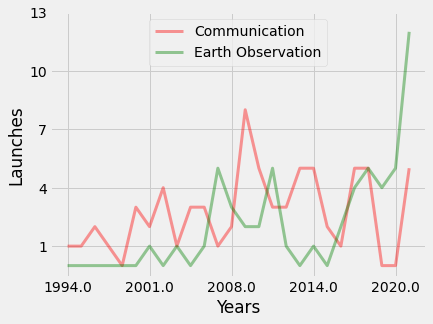

In [1252]:
euplots = Master_Table_Dates.where("Country of Operator/Owner", are.contained_in(EUCOM.column(0))).pivot("Purpose", "Date of Launch")
euplots.show()

times = euplots.column(0)
overlapping = 0.40

eu1 = euplots.column(1) + euplots.column(2)
eu2 = euplots.column(3) + euplots.column(4) + euplots.column(5) + euplots.column(7)
eu3 = euplots.column(13) + euplots.column(12) + euplots.column(10)


print("Major Areas of Development")
l1 = plots.plot(times, eu1, c='red', alpha=overlapping, lw=3, label = 'Communication')
l2 = plots.plot(times, eu2, c='green',label = 'Earth Observation', alpha=overlapping, lw=3)
sets = plots.xticks(range(0,30,6))
yrange = plots.yticks(range(1, 14,3))
xlab = plots.xlabel("Years") 
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)



Other Areas of Development


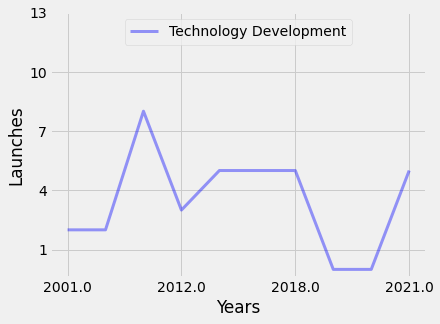

In [1239]:
Table = euplots.select(0).with_columns("Communication", eu1, "Earth Observation", eu2, "Technology Development", eu3)

EU3 = Table.where("Technology Development", are.not_equal_to(0))
print("Other Areas of Development")
l3 = plots.plot(EU3.column(0), EU3.column(1), c='blue',label = 'Technology Development', alpha=overlapping, lw=3)
xrange = plots.xticks(range(0, 12, 3))
yrange = plots.yticks(range(1, 14,3))
xlab = plots.xlabel("Years") 
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)

# PACOM

Country of Operator/Owner,Earth Science,Navigation/Regional Positioning,Space Science,Technology Demonstration,Technology Development,Communication,Earth Observation
India,0,8,2,0,5,20,23
India/Canada,0,0,0,0,0,0,1
India/France,0,0,0,0,0,0,2
Japan,1,5,3,5,20,22,34
Japan/Singapore,0,0,0,0,1,1,0
Singapore,0,0,0,0,4,0,3
Singapore/Taiwan,0,0,0,0,0,1,0
South Korea,0,0,3,0,1,5,8
Thailand,0,0,0,0,0,4,3


General Capability Numbers


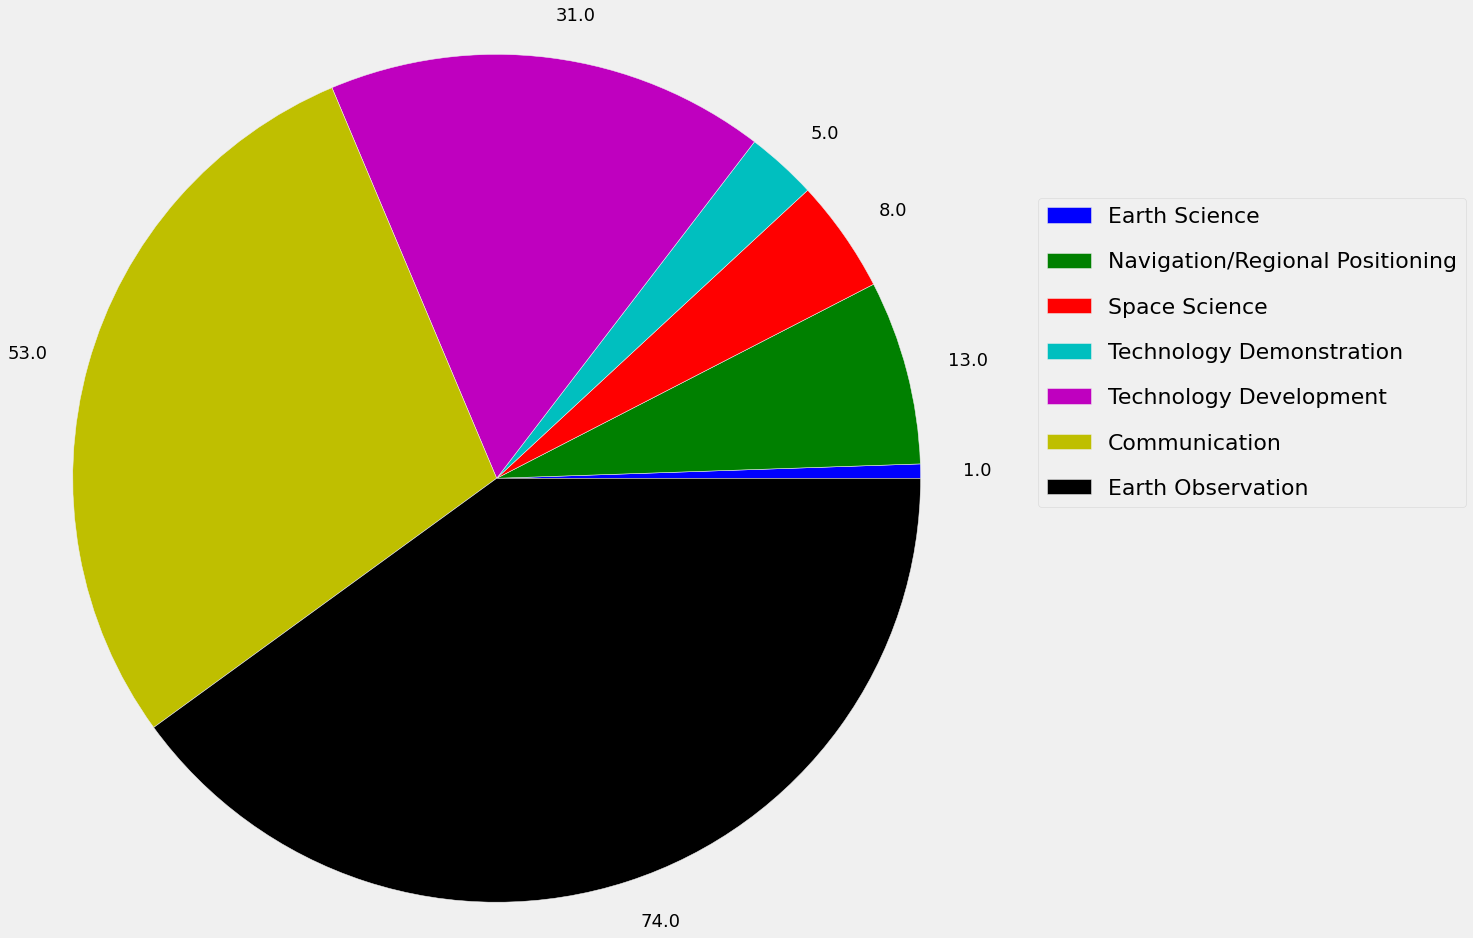

In [1246]:
pacom = make_array("India", "Singapore", "Japan", "South Korea", "Thailand")

pacom_arr = make_array()
for i in pacom:
    col = Master_Table.where("Country of Operator/Owner", are.containing(i)).column("Country of Operator/Owner")
    for k in col:
        pacom_arr = np.append(pacom_arr, k)
        
PACOM = Master_Table.where("Country of Operator/Owner", are.contained_in(pacom_arr)).where("Country of Operator/Owner", are.not_containing("USA"))

PACOM = PACOM.pivot("Purpose", "Country of Operator/Owner")


comu = PACOM.column(1) + PACOM.column(2)
ear_ob = PACOM.column(3) + PACOM.column(4) + PACOM.column(5)

PACOM = PACOM.drop(1,2,3,4,5).with_columns("Communication", comu, "Earth Observation", ear_ob)
PACOM.show()

values = make_array()
for i in PACOM.drop(0).labels:
    stat = sum(PACOM.column(i))
    values = np.append(values, stat)
print("General Capability Numbers")    
caps = plots.pie(x=values, labels = values, textprops={'fontsize': 18}, radius=4, colors = make_array('b','g','r','c','m','y','k'))
leg = plots.legend(labels = PACOM.drop("Country of Operator/Owner").labels, loc='upper right', bbox_to_anchor = (4.2,1.6),labelspacing = 1.15, fontsize = 22) 



Date of Launch,Communications,Communications/Navigation,Earth Observation,Earth Observation/Communications,Earth Observation/Technology Development,Earth Science,Navigation/Regional Positioning,Space Science,Technology Demonstration,Technology Development
1999.0,1,0,0,0,0,0,0,0,0,0
2002.0,1,0,0,0,0,0,0,0,0,0
2003.0,0,0,1,0,0,0,0,0,0,1
2005.0,1,0,1,0,0,0,0,0,0,1
2006.0,3,0,0,0,1,0,0,0,0,0
2007.0,2,0,1,0,0,0,0,0,0,0
2008.0,1,0,2,0,0,0,0,0,0,1
2009.0,1,0,3,0,0,0,0,0,0,2
2010.0,2,0,1,1,0,0,1,0,0,0
2011.0,3,1,5,0,0,0,0,1,0,1


Major Areas of Development


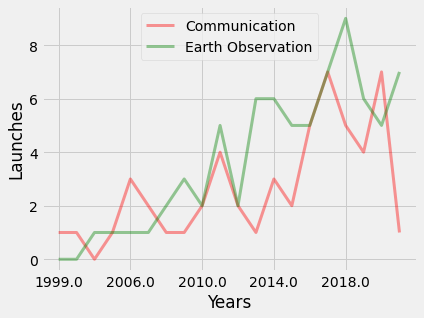

In [1216]:
pacplots = Master_Table_Dates.where("Country of Operator/Owner", are.contained_in(PACOM.column(0))).pivot("Purpose", "Date of Launch")
pacplots.show()

tim = pacplots.column(0)
overlapping = 0.40

pac1 = pacplots.column(1) + pacplots.column(2)
pac2 = pacplots.column(3) + pacplots.column(4) + pacplots.column(5)

print("Major Areas of Development")
lin1 = plots.plot(tim, pac1, c='red', alpha=overlapping, lw=3, label = 'Communication')
lin2 = plots.plot(tim, pac2, c='green',label = 'Earth Observation', alpha=overlapping, lw=3)
sets = plots.xticks(range(0,23,4))
xlab = plots.xlabel("Years") 
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)


Other Areas of Development


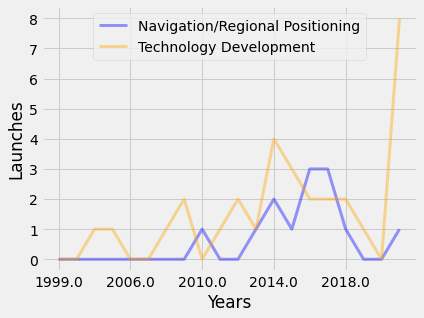

In [1218]:
print("Other Areas of Development")
lin1 = plots.plot(tim, pacplots.column("Navigation/Regional Positioning"), c='blue', alpha=overlapping, lw=3, label = 'Navigation/Regional Positioning')
lin2 = plots.plot(tim, pacplots.column("Technology Development"), c='orange',label = 'Technology Development', alpha=overlapping, lw=3)
sets = plots.xticks(range(0,23,4))
xlab = plots.xlabel("Years") 
ylab = plots.ylabel("Launches") 
leg = plots.legend(loc = 9)

## Data Pulls: Capability and Specific Capability Lists

In [577]:
Spec_Cap_Piv = Sat_Table.where("Users", are.equal_to("Military")).select("Detailed Purpose", "Country of Operator/Owner").pivot("Country of Operator/Owner", "Detailed Purpose")
Spec_Cap_Piv.select("Detailed Purpose", "China", "Russia", "USA", "Canada", "United Kingdom", "Germany", "France")

#China

China_spec_cap_piv = Sat_Table.where("Users", are.equal_to("Military")).where("Country of Operator/Owner", are.containing("China")).pivot("Contractor", "Detailed Purpose")
China_spec_cap_piv

Detailed Purpose,Academy of Military Science,CAST/Changchun Light Technology Institute,China Academy of Space Technology (CAST),China Academy of Space Tecnology (CAST),Innovation Academy for Microsatellites,National University of Defense Technology,Shanghai Academy of Satellite Technology (SAST),Shanghai Academy of Spaceflight Technology (SAST)
Electronic Intelligence,0,2,50,1,3,0,4,0
Optical Imaging,0,0,12,0,0,0,3,1
Radar Imaging,0,0,3,0,0,0,2,0
nan,1,0,5,0,0,1,0,0


In [627]:
Sat_Table.select("Purpose", "Detailed Purpose").group("Purpose").show()

Purpose,count
Communication,2
Communications,3122
Communications/Maritime Tracking,5
Communications/Navigation,1
Communications/Technology Development,5
Earth Observarion,1
Earth Observation,1013
Earth Observation,4
Earth Observation/Communications,2
Earth Observation/Communications/Space Science,1


In [626]:
Sat_Table.where("Users", are.equal_to("Military")).select("Purpose", "Country of Operator/Owner").pivot("Country of Operator/Owner", "Purpose").show()

Purpose,count
Communication,2
Communications,3122
Communications/Maritime Tracking,5
Communications/Navigation,1
Communications/Technology Development,5
Earth Observarion,1
Earth Observation,1013
Earth Observation,4
Earth Observation/Communications,2
Earth Observation/Communications/Space Science,1


Purpose,Canada,China,Colombia,Denmark,France,France/Italy,France/Italy/Belgium/Spain/Greece,Germany,India,Iran,Israel,Italy,Japan,Mexico,Russia,South Africa,South Korea,Spain,Thailand,Turkey,USA,USA/Sweden,United Arab Emirates,United Kingdom
Communications,0,2,0,0,3,1,0,2,2,0,0,1,1,0,42,0,1,1,0,0,52,0,0,6
Earth Observation,0,83,1,1,9,0,2,5,7,1,7,1,0,2,17,1,0,0,2,2,65,0,1,0
Earth Observation/Technology Development,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Earth Science,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Earth/Space Observation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Space Observation,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
Space Science,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Technology Demonstration,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Technology Development,0,3,0,0,2,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,55,1,0,0
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0


# Some Initial Looks at Allies: Five Eyes Plus 2 SATCOM Analysis

Country of Operator/Owner,Civil,Commercial,Government,Government/Commercial,Military,Military/Commercial
Australia,0,7,0,0,0,1
Canada,0,34,0,0,0,0
USA,2,2105,8,77,52,0
USA/Canada,0,2,0,0,0,0
United Kingdom,0,430,0,0,6,0


Date of Launch,FEP2 SATCOM Launches
1974.0,1
1988.0,1
1989.0,1
1990.0,1
1991.0,1
1993.0,2
1994.0,1
1995.0,4
1996.0,4
1997.0,14


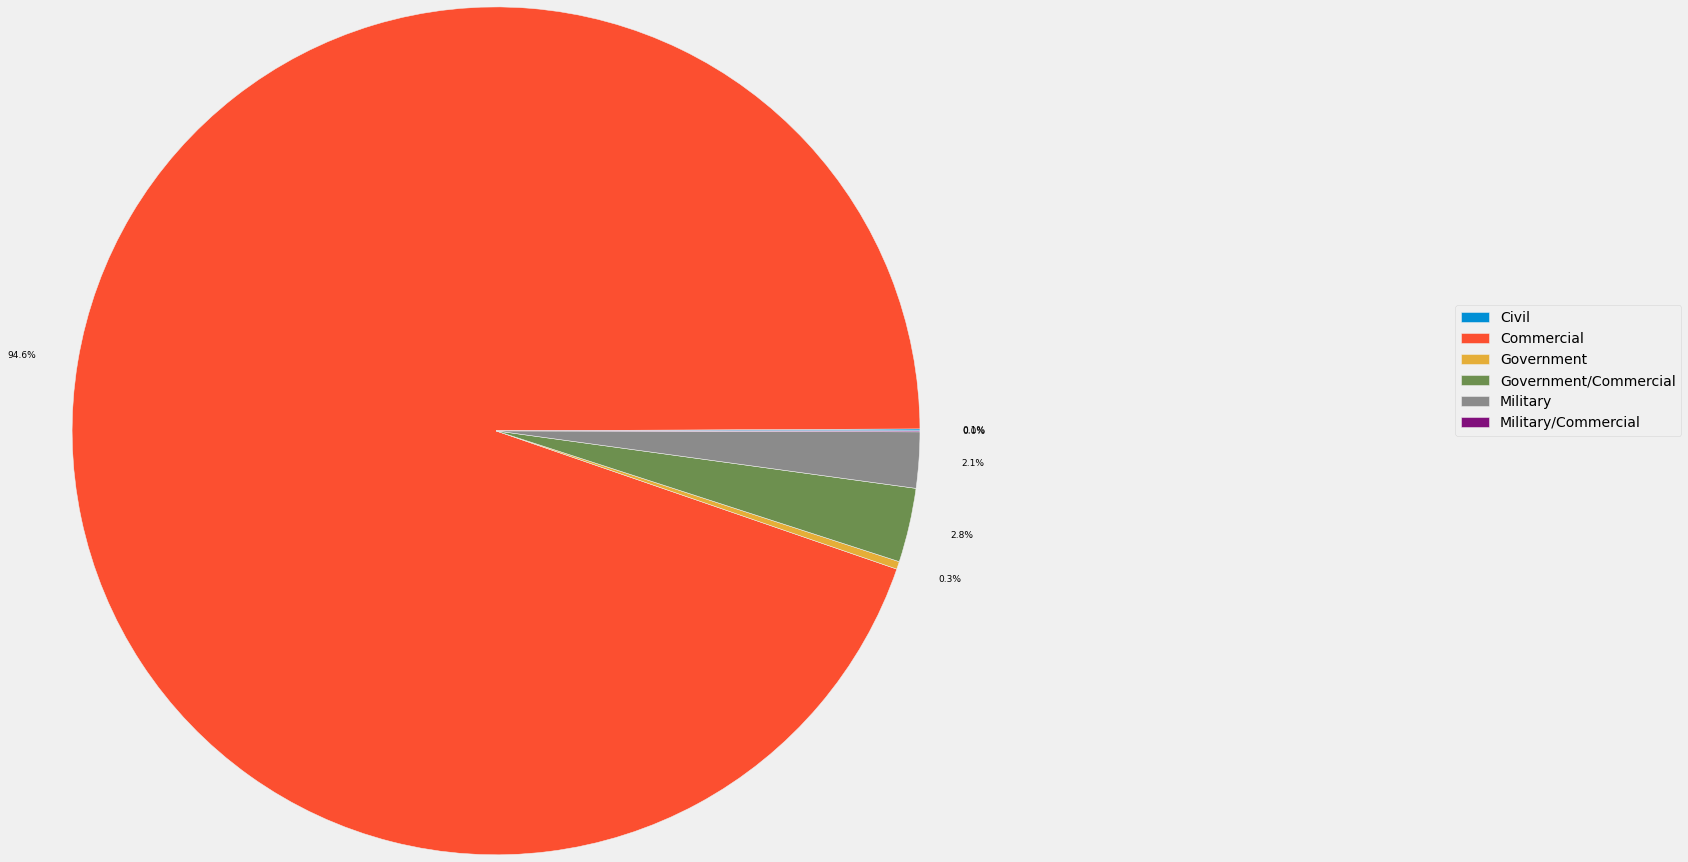

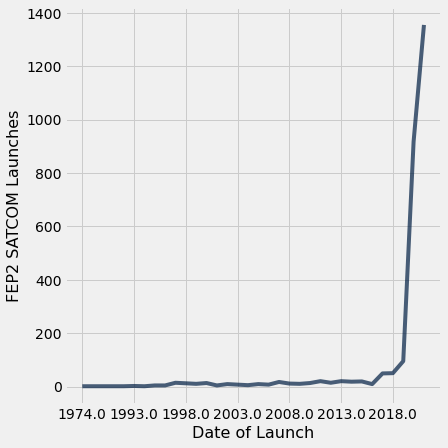

In [1103]:
five_eyes_plus_2 = make_array("USA", "United Kingdom", "Australia", "Canada", "New Zealand", "USA/Canada")
fep2 = Sat_Table.where("Country of Operator/Owner", are.contained_in(five_eyes_plus_2)).where("Purpose", are.containing("Communication"))
fep2_pivot = fep2.pivot("Users", "Country of Operator/Owner")
fep2_pivot.show()

#What is the percentage breakdown of Users (Sectors) for Five Eyes Plus 2 SATCOM?

new_table = fep2_pivot.drop("Country of Operator/Owner")
new_array = make_array()
for i in np.arange(len(new_table.labels)):
    stat = sum(new_table.column(i))
    new_array = np.append(new_array, stat)
newest_array = new_array/sum(new_array)
new_labels = make_array()
for i in np.arange(len(new_array)):
    val = str(np.round_(newest_array.item(i)*100,decimals=1))+"%"
    new_labels = np.append(new_labels, val)
plots.pie(x=newest_array, labels = new_labels, textprops={'fontsize': 9}, radius=4)
plots.legend(labels = fep2_pivot.drop("Country of Operator/Owner").labels, loc='upper right', bbox_to_anchor = (5,1))

#Five Eyes Plus 2 (FEP2) SATCOM Launches Overtime:

fep2_dates = Master_Table_Dates.where("Country of Operator/Owner", are.contained_in(five_eyes_plus_2)).where("Purpose", are.containing("Communication")).pivot("Country of Operator/Owner", "Date of Launch")
fep2_launches = fep2_dates.drop("Date of Launch").apply(sum)
fep2_plot = fep2_dates.select("Date of Launch").with_columns("FEP2 SATCOM Launches", fep2_launches)
fep2_plot.show()
Fep2_Plot = fep2_plot.plot("Date of Launch", "FEP2 SATCOM Launches")
plots.xticks(range(0,35,5))
Fep2_Plot


# Some Data Cleaning

In [892]:
Sat_Table.where("Country of Contractor", are.equal_to("UK")).show(10)

"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 28,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
Alsat-1B,Alsat-1B,Algeria,Algeria,Algerian Space Agency (ASAL),Government,Earth Observation,Optical Imaging,LEO,Sun-Synchronous,0,661,704,0.00305,98.2,98.4,103,nan,nan,9/26/2016,5,Surrey Satellite Technology Ltd.,UK,Satish Dhawan Space Centre,PSLV,2016-059C,41785,"Imagery for agricultural and resource monitoring, disast ...",nan,JMSatcat/12_16,http://spaceflightnow.com/2016/09/26/india-declares-succ ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Alsat-1N,AlSat-1N,Algeria,Algeria,Algerian Space Agency (ASAL)/UK Space Agency,Government,Technology Development,nan,LEO,Sun-Synchronous,0,661,698,0.00262,98.2,98.3,10,nan,nan,9/26/2016,nan,Surrey Satellite Technology Ltd.,UK,Satish Dhawan Space Centre,PSLV,2016-059G,41789,Technology demonstration satellite for Algerian students.,nan,JMSatcat/12_16,http://spaceflightnow.com/2016/09/26/india-declares-succ ...,nan,http://gadgets.ndtv.com/science/news/isro-successfully-p ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CBNT-1 (Carbonite 1),CBNT-1,NR,United Kingdom,Surrey Satellite Technology Ltd.,Commercial,Technology Development,nan,LEO,Sun-Synchronous,0,636,658,0.00157,98,97.66,91,nan,nan,7/10/2015,nan,Surrey Satellite Technology Ltd.,UK,Satish Dhawan Space Centre,PSLV,2015-032D,40718,Demonstrate earth observation techniques.,nan,JM/8_15,http://www.nasaspaceflight.com/2015/07/indian-pslv-launc ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CBNT-2 (Carbonite 2),CBNT-2,United Kingdom,United Kingdom,Earth-i/Surrey Satellite Technology Ltd.,Commercial,Technology Development,nan,LEO,Sun-Synchronous,0,493,505,0.000873,97.5,94.5,nan,nan,nan,1/11/2018,nan,Surrey Satellite Technology Ltd.,UK,Satish Dhawan Space Centre,PSLV,2018-004E,43115,Pathfinder mission for the Earth-i constellation of high ...,nan,JMSatcat/5_18,https://spaceflight101.com/pslv-c40/carbonite-2/,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CERES 1 (CapacitÉ de Renseignement Électromagnétique Spa ...,CERES,NR (1/22),France,Ministry of Armed Forces,Military,Earth Observation,Electronic Intelligence,LEO,Polar,0,669,672,0.000213,75,nan,400,nan,nan,11/16/2021,nan,Thales Alenia Space,UK,Guiana Space Center,Vega,2021-105A,49464,Will collect information on radio frequency and radar in ...,nan,JMSatcat/1_22,https://spaceflightnow.com/2021/11/16/french-military-in ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CERES 2 (CapacitÉ de Renseignement Électromagnétique Spa ...,CERES,NR (1/22),France,Ministry of Armed Forces,Military,Earth Observation,Electronic Intelligence,LEO,Polar,0,671,672,7.1e-05,74.85,nan,400,nan,nan,11/16/

In [4]:
#Country Name Change for Contractor Column **"UK" in contractor column, but "United Kingdom" in Operator/Owner Column**

new_col_values = make_array()
for i in np.arange(Sat_Table.num_rows):
    new = Sat_Table.column("Country of Contractor").item(i).replace("UK", "United Kingdom")
    new_col_values = np.append(new_col_values, new)



In [893]:
Master_Table = Sat_Table.drop("Country of Contractor").with_columns("Country of Contractor", new_col_values)
Master_Table.show(10)

"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 28,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Country of Contractor
1HOPSAT-TD (1st-generation High Optical Performance Sate ...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0,566,576,0.000720357,36.9,96.08,22,nan,nan,12/11/2019,0.5,Hera Systems,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation constellation.,nan,JMSatcat/3_20,https://spaceflightnow.com/2019/12/11/indias-50th-pslv-l ...,https://www.herasys.com/,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA
Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,nan,LEO,Sun-Synchronous,0,497,517,0.00145,97.45,94.7,5,nan,4.5,6/23/2017,2,Aalto University,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,nan,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/satellite-mi ...,nan,http://www.planet4589.org/space/log/satcat.txt,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Finland
AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0,442,687,0.0177,98.2,95.9,1,nan,nan,4/25/2016,nan,University of Aalborg,Guiana Space Center,Soyuz-2.1a,2016-025E,41460,Carries AIS system.,nan,Space50,http://spaceflightnow.com/2016/04/26/soyuz-blasts-off-wi ...,nan,http://space50.org/objekt.php?mot=2016-025E&jazyk=pp_en,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Denmark
"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,75,"35,778","35,793",0.000178,0.08,1436.03,"6,330",nan,"16,000",2/6/2014,15,Space Systems/Loral,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transponders. $214 ...",nan,ZARYA,http://www.absatellite.net/satellite-fleet/?sat=abs6,nan,http://www.zarya.info/Diaries/Launches/Launches.php?year ...,http://www.absatellite.net/2010/10/13/asia-broadcast-sat ...,http://www.spacenews.com/article/satellite-telecom/42218 ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA
ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-75,"35,700","35,700",0,0,1436.1,"1,800",nan,nan,6/15/2016,15,Boeing Satellite Systems,Cape Canaveral,Falcon 9,2016-038A,41588,nan,nan,Estimated,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA
ABS-3A,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-3,"35,788","35,803",0.000178,0.1,1436,"2,000",nan,nan,3/2/2015,15,Boeing Satellite Systems,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.,nan,na

# Exploratory Data Analysis (EDA) beginning with export/import analysis

In [216]:
##Amount of business exported/imported

def num_exports(country):
    table = Master_Table.where("Country of Contractor", are.equal_to(country)).where("Country of Operator/Owner", are.not_equal_to(country))
    return table.num_rows

def num_imports(country):
    table = Master_Table.where("Country of Operator/Owner", are.equal_to(country)).where("Country of Contractor", are.not_equal_to(country))
    return table.num_rows

IE_Table = Table().with_columns("Countries", make_array('Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands',
       'Norway', 'New Zealand', 'Poland', 'Romania', 'South Korea',
       'Spain', 'Thailand', 'United Kingdom', 'USA', 'China', 'Russia'))

country_names = Table().with_columns("Countries", make_array('Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands',
       'Norway', 'New Zealand', 'Poland', 'Romania', 'South Korea',
       'Spain', 'Thailand', 'United Kingdom', 'USA', 'China', 'Russia'))

country_array = make_array('Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany',
       'India', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands',
       'Norway', 'New Zealand', 'Poland', 'Romania', 'South Korea',
       'Spain', 'Thailand', 'United Kingdom', 'USA', 'China', 'Russia')


In [214]:
export_vals = country_names.apply(num_exports, "Countries")
import_vals = country_names.apply(num_imports, "Countries")

In [9]:
export_vals

array([  0,   3,   5,  10,  79,   7,   3,   3,  29,   7,   1,   4,   0,
         0,   1,   0,   2,   0,   0,  28, 434,  19,   5])

In [10]:
import_vals

array([  9,   0,  23,   0,   8,   9,   1,   1,   3,  16,  33,   8,   5,
         0,   0,   0,   8,  16,   7, 326, 129,  15,  10])

In [886]:
#This data does not account for exports where the contractor is a group of countries 

IE_Table = IE_Table.with_columns("Imports (Count)", import_vals, "Exports (Count)", export_vals)

## Pulling data to analyze exports & imports under different lenses

In [453]:
#Function to get the import/export "Users" pivot table for a given country 

def imp_users_table_getter(country):
    return Master_Table.where("Country of Operator/Owner", are.equal_to(country)).where("Country of Contractor", are.not_equal_to(country)).select("Country of Contractor", "Users").pivot("Users", "Country of Contractor")

def exp_users_table_getter(country):
    return Master_Table.where("Country of Contractor", are.equal_to(country)).where("Country of Operator/Owner", are.not_equal_to(country)).select("Country of Contractor", "Users").pivot("Users", "Country of Contractor")


In [455]:
#Function to get the import/export "Contractor" pivot table for a given country 

def imp_cont_table_getter(country):
    return Master_Table.where("Country of Operator/Owner", are.equal_to(country)).where("Country of Contractor", are.not_equal_to(country)).select("Country of Contractor", "Contractor").pivot("Contractor", "Country of Contractor")

def exp_cont_table_getter(country):
    return Master_Table.where("Country of Contractor", are.equal_to(country)).where("Country of Operator/Owner", are.not_equal_to(country)).select("Country of Contractor", "Contractor").pivot("Contractor", "Country of Contractor")

In [884]:
#Function to get the "Purpose" pivot table for a given country
def purp_table_getter(country):
    return Master_Table.where("Country of Operator/Owner", are.equal_to(country)).select("Country of Operator/Owner", "Purpose").pivot("Purpose", "Country of Operator/Owner")

## Component functions for used for generating data visualizations 

In [458]:
#Table is formatted with the first column as "Country of Contractor". Pie Charts will have labels are percents of total
#and legend will contain specific user info

def sum_of_elements(table):
    sum_array = make_array()
    for i in np.arange(1, len(table.labels)):
        stat = sum(table.column(i))
        sum_array = np.append(sum_array, stat)
    return sum(sum_array)


In [1058]:
#Function to get labels for "Users" brekadown of country import/exports

def labels(piv_table):
    labels = piv_table.drop("Country of Contractor").row(0)/sum_of_elements(piv_table)
    new_labels = make_array()
    for i in np.arange(len(labels)):
        stat = str(np.round_(labels.item(i)*100,decimals=1))+"%"
        new_labels = np.append(new_labels, stat)
    return new_labels

def labels_2(piv_table):
    labels = piv_table.drop("Country of Operator/Owner").row(0)/sum_of_elements(piv_table)
    new_labels = make_array()
    for i in np.arange(len(labels)):
        stat = str(np.round_(labels.item(i)*100,decimals=1))+"%"
        new_labels = np.append(new_labels, stat)
    return new_labels


# Function to generate tailored pie chart visualizations

In [1057]:
def pie_chart(piv_table, cord1, cord2):
    if piv_table.num_rows == 1:
        plots.style.use('_mpl-gallery-nogrid')
        x = piv_table.drop("Country of Contractor").row(0)
        return plots.pie(x, labels = labels(piv_table), radius = 5, colors = make_array('b','g','r','c','m','y','k','lime','darkorange','indigo')) and plots.legend(labels = piv_table.drop("Country of Contractor").labels, 
                                         loc='upper right', bbox_to_anchor = (cord1,cord2))
    elif piv_table.num_rows == 0:
        return print("No Visuals Available.")
        
    else:
        new_table = piv_table.drop("Country of Contractor")
        new_array = make_array()
        for i in np.arange(len(new_table.labels)):
            stat = sum(new_table.column(i))
            new_array = np.append(new_array, stat)
        newest_array = new_array/sum(new_array)
        new_labels = make_array()
        for i in np.arange(len(new_array)):
            val = str(np.round_(newest_array.item(i)*100,decimals=1))+"%"
            new_labels = np.append(new_labels, val)
        return plots.pie(x=newest_array, labels = new_labels,radius = 3, colors = make_array('b','g','r','c','m','y','k','lime','darkorange','indigo')) and plots.legend(labels = piv_table.drop("Country of Contractor").labels, 
                                         loc='upper right', bbox_to_anchor = (cord1,cord2))


# COUNTRY PROFILES:

# AUSTRALIA

In [591]:
#Australia: Space import/export analysis

aus_imp_users_table = imp_users_table_getter("Australia")
aus_exp_users_table = exp_users_table_getter("Australia")
aus_imp_cont_table = imp_cont_table_getter("Australia")
aus_exp_cont_table = exp_cont_table_getter("Australia")

#Australia has no recorded satellite exports (as an individual producer)

## Australia import totals from USA (only known individual exporter to Australia)

In [590]:
aus_imp_users_table

Country of Contractor,Commercial,Military/Commercial
USA,8,1


## Australia import totals from USA contractors

In [194]:
aus_imp_cont_table

Country of Contractor,Orbital Sciences Corp.,Pumpkin Space Systems,Space Systems/Loral
USA,3,2,4


## Australia: Space Imports By Sector visualizations

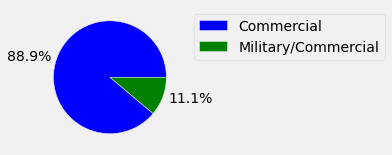

In [584]:
a1=pie_chart(aus_imp_users_table, 2.5, 1)

## Australia: Space Imports By Contractor visualizations

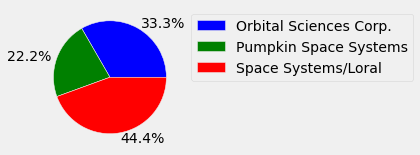

In [589]:
a2=pie_chart(aus_imp_cont_table, 2.7, 1)

## Australia: Launches vs. Time for Space Objects produced in Australia. Can denote domestic-use or exported products

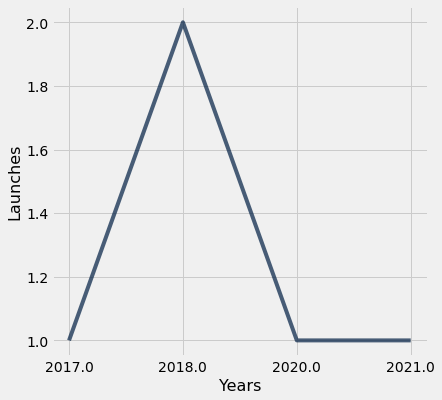

In [340]:
launch_plot_nonzero("Australia")

## Australia (soveriegn authority) satellite usage breakdown:

Country of Operator/Owner,Communications,Technology Development
Australia,8,6


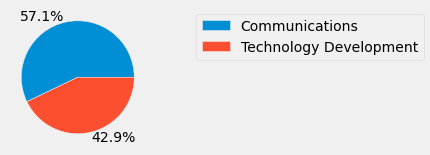

In [588]:
aus = purp_table_getter("Australia")
aus.show()
pie_aus = aus.drop("Country of Operator/Owner")
a3=plots.pie(x=pie_aus.row(0),labels=labels_2(aus))
plots.legend(labels=pie_aus.labels,loc='upper right', bbox_to_anchor=(3,1))

## Australia's Sovereign Capabilities by Contractor

In [592]:
Aus_cap_piv = Sat_Table.where("Country of Operator/Owner", are.containing("Australia")).pivot("Contractor", "Purpose").show()

Purpose,Defence Science and Technology Group/University of New South Wales,Fleet Space Technologies,Orbital Sciences Corp.,Pumpkin Space Systems,Space Systems/Loral,University of New South Wales
Communications,0,0,3,1,4,0
Technology Development,1,2,0,1,0,2


# BELGIUM

In [201]:
#Belgium: Space import/export analysis

bel_imp_users_table = imp_users_table_getter("Belgium")
bel_exp_users_table = exp_users_table_getter("Belgium")
bel_imp_cont_table = imp_cont_table_getter("Belgium")
bel_exp_cont_table = exp_cont_table_getter("Belgium")

#Belgium has no recorded imports

#Belgium export totals by sector
bel_exp_users_table

Country of Contractor,Government
Belgium,3


In [203]:
#Belgium exports by Contractor
bel_exp_cont_table

Country of Contractor,QinetiQ Space Belgium,Verhaert Design and Development NV (leading a European consortium)
Belgium,1,2


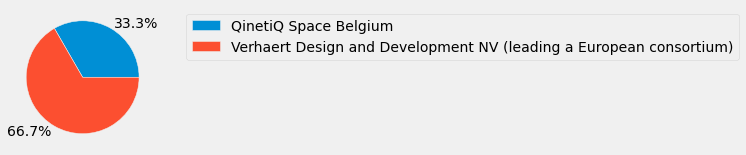

In [216]:
#Belgium: Space Exports By Contractor Visualization
pie_chart(bel_exp_cont_table, 5.2, 1)

# CANADA

In [833]:
#Canada: import/export analysis

can_imp_users_table = imp_users_table_getter("Canada")
can_exp_users_table = exp_users_table_getter("Canada")
can_imp_cont_table = imp_cont_table_getter("Canada")
can_exp_cont_table = exp_cont_table_getter("Canada")

#Canada imports by Sector
can_imp_users_table

Country of Contractor,Commercial,Military
Canada/Italy,1,0
France,2,0
France/United Kingdom/Germany/Spain,3,0
USA,13,0
United Kingdom,3,0
United Kingdom/Canada,0,1


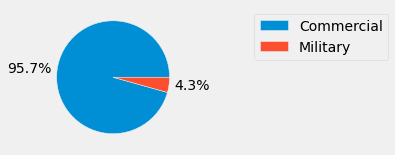

In [227]:
#Canada: Space Imports by Sector
pie_chart(can_imp_users_table, 2.5, 1)

In [207]:
#Canada exports by Sector
can_exp_users_table

Country of Contractor,Civil,Commercial,Government
Canada,2,1,2


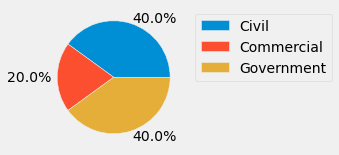

In [229]:
#Canada: Space exports by Sector
pie_chart(can_exp_users_table, 2.1, 1)

In [231]:
#Canada imports by Contractor
can_imp_cont_table

Country of Contractor,Airbus Defense and Space,Boeing Satellite Systems,Clyde Space,EADS Astrium,"MacDonald, Dettwiler/Thales Alenia Spazio",Space Systems/Loral,SpaceQuest,Surrey Satellite Technology Ltd.,"Surrey Satellite Technology Ltd./MacDonald, Dettwiler and Associates",Thales Alenia Space
Canada/Italy,0,0,0,0,1,0,0,0,0,0
France,0,0,0,1,0,0,0,0,0,1
France/United Kingdom/Germany/Spain,1,0,0,2,0,0,0,0,0,0
USA,0,2,0,0,0,7,4,0,0,0
United Kingdom,0,0,2,0,0,0,0,1,0,0
United Kingdom/Canada,0,0,0,0,0,0,0,0,1,0


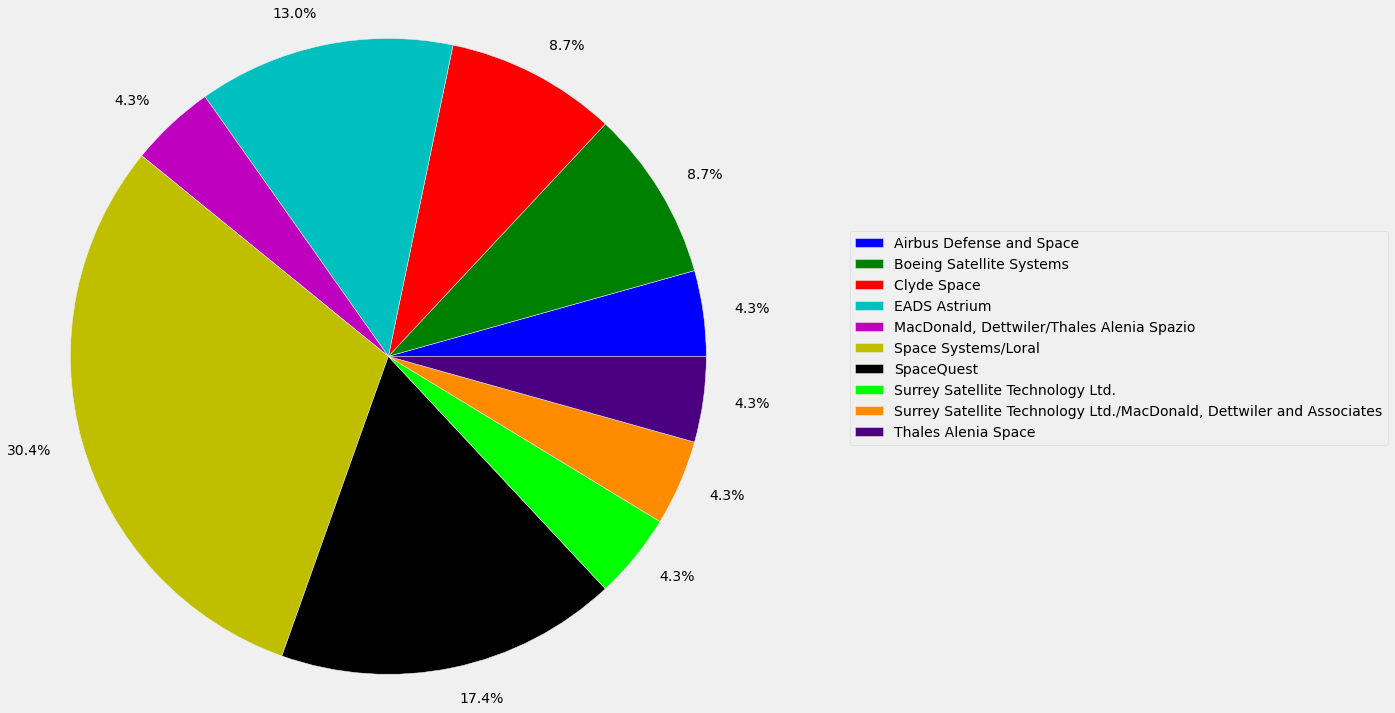

In [837]:
#Canada: Imports by Contractor
pie_chart(can_imp_cont_table, 4.3, 1)

In [835]:
#Canada exports by contractor
can_exp_cont_table

Country of Contractor,Kongsberg Seatex AS/University of Toronto Institute for Aerospace Studies,Spar Aerospace,UNITAS Space Flight Laboratory (SFL),University of Toronto Institute for Aerospace Studies (UTIAS),University of Toronto Institute for Aerospace Studies Space Flight Laboratory
Canada,1,1,1,1,1


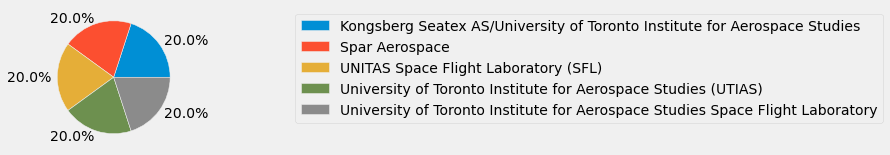

In [234]:
#Canada: Exports by Contractor
pie_chart(can_exp_cont_table, 6, 1)

# DENMARK

In [236]:
#Denmark: import/export analysis

den_imp_users_table = imp_users_table_getter("Denmark")
den_exp_users_table = exp_users_table_getter("Denmark")
den_imp_cont_table = imp_cont_table_getter("Denmark")
den_exp_cont_table = exp_cont_table_getter("Denmark")

#Denmark has no recorded imports

#Denmark exports by sector
den_exp_users_table

Country of Contractor,Commercial,Government,Military
Denmark,8,1,1


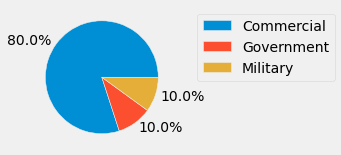

In [239]:
#Denmark: Exports by Sector
pie_chart(den_exp_users_table, 2.2, 1)

In [240]:
#Denmark exports by Contractor
den_exp_cont_table

Country of Contractor,GOMSpace,GomSpace,GomSpace ApS
Denmark,1,2,7


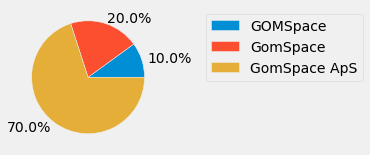

In [244]:
#Denmark: Exports by Contractor
pie_chart(den_exp_cont_table, 2.5, 1)

# FRANCE

In [838]:
#France: import/export analysis

fra_imp_users_table = imp_users_table_getter("France")
fra_exp_users_table = exp_users_table_getter("France")
fra_imp_cont_table = imp_cont_table_getter("France")
fra_exp_cont_table = exp_cont_table_getter("France")

#France imports by sector
fra_imp_users_table

Country of Contractor,Commercial,Military
Denmark,2,0
France/Italy,0,2
United Kingdom,0,4


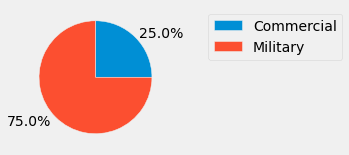

In [248]:
#France: Imports By Sector
pie_chart(fra_imp_users_table, 2.3, 1)

In [249]:
#France imports by Contractor
fra_imp_cont_table

Country of Contractor,Alcatel Alenia Space,GomSpace ApS,Thales Alenia Space
Denmark,0,2,0
France/Italy,2,0,0
United Kingdom,0,0,4


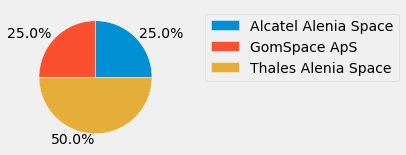

In [252]:
#France: Imports By Contractor
pie_chart(fra_imp_cont_table, 2.7, 1)

In [253]:
#France exports by sector
fra_exp_users_table

Country of Contractor,Commercial,Government,Government/Civil,Government/Commercial/Military,Government/Military,Military/Commercial
France,53,19,2,1,2,2


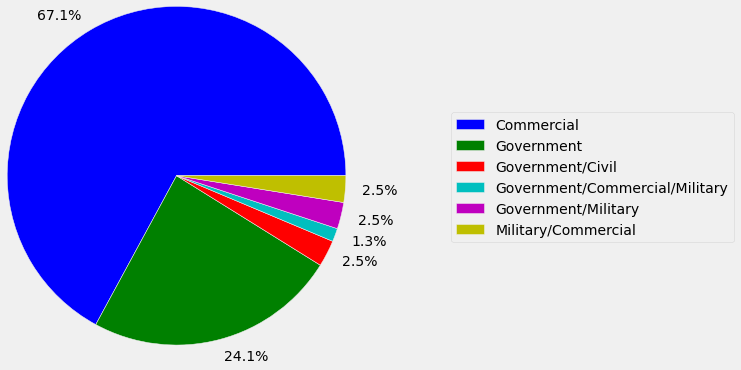

In [845]:
#France: Exports by Sector
pie_chart(fra_exp_users_table, 4.5,1)

In [256]:
#France exports by Contractor
fra_exp_cont_table

Country of Contractor,Airbus Defence and Space,Airbus Defense and Space,Alcatel Alenia Space,Alcatel Space Industries,Astrium,Astrium/Thales Alenia Space,CNES,EADS Astrium,Thales,Thales Alenia Space
France,1,3,2,8,7,3,1,12,1,41


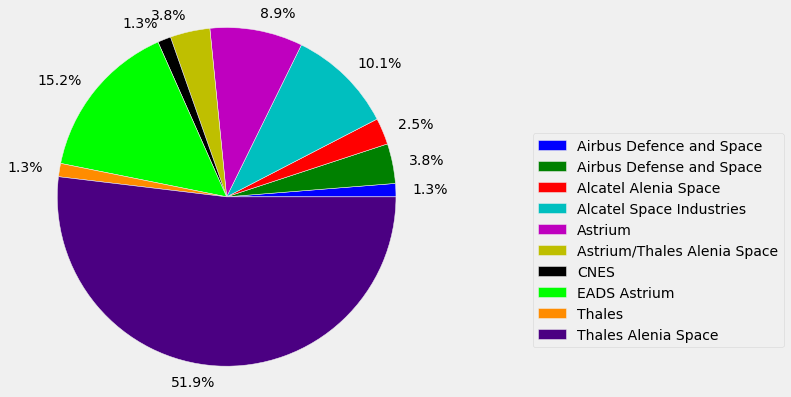

In [847]:
#France: Exports By Contractor
pie_chart(fra_exp_cont_table, 4.5,1)

# GERMANY

In [848]:
#Germany: import/export analysis

deu_imp_users_table = imp_users_table_getter("Germany")
deu_exp_users_table = exp_users_table_getter("Germany")
deu_imp_cont_table = imp_cont_table_getter("Germany")
deu_exp_cont_table = exp_cont_table_getter("Germany")

#Germany imports by sector
deu_imp_users_table

Country of Contractor,Commercial,Government,Government/Commercial,Military
China,4,0,0,0
Denmark,0,1,0,0
France/Italy,0,0,0,2
France/United Kingdom/Germany/Spain,0,1,1,0


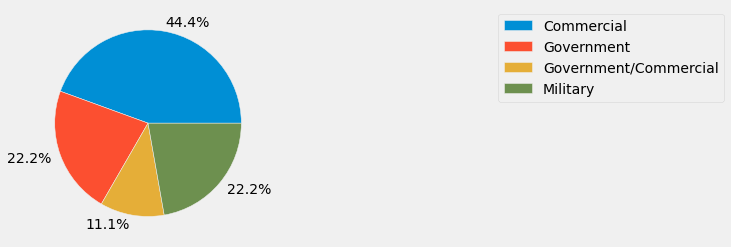

In [461]:
#Germany: Imports By Sector
pie_chart(deu_imp_users_table, 3,1)

In [262]:
#Germany imports by contractor
deu_imp_cont_table

Country of Contractor,EADS Astrium,GomSpace,"Innovation Academy for Microsatellites, Chinese Academy of Sciences","Shanghai Institute of Microsatellite Innovation, Chinese Academy of Sciences",Thales Alenia Space
China,0,0,2,2,0
Denmark,0,1,0,0,0
France/Italy,0,0,0,0,2
France/United Kingdom/Germany/Spain,2,0,0,0,0


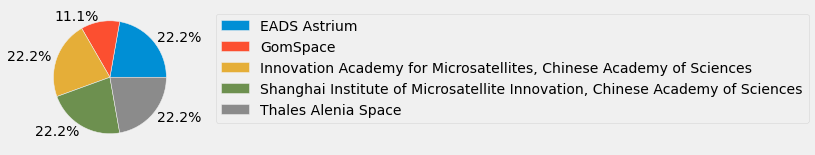

In [265]:
#Germany: Imports By Contractor
pie_chart(deu_imp_cont_table, 5.5,1)

In [266]:
#Germany exports by sector
deu_exp_users_table

Country of Contractor,Civil,Commercial,Government
Germany,2,3,2


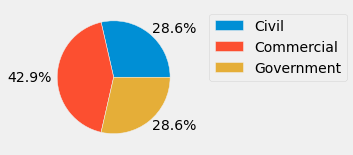

In [269]:
#Germany: Exports By Sector
pie_chart(deu_exp_users_table, 2.2,1)

In [270]:
#Germany exports by contractor
deu_exp_cont_table

Country of Contractor,Airbus Defense and Space,German Orbital Systems,OHB Germany,OHB System-AG,Technical University Berlin
Germany,1,3,1,1,1


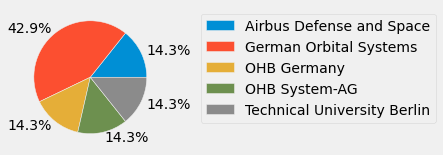

In [273]:
#Germany: Exports by Contractor
pie_chart(deu_exp_cont_table, 3,1)

# INDIA

In [274]:
#India: import/export analysis

ind_imp_users_table = imp_users_table_getter("India")
ind_exp_users_table = exp_users_table_getter("India")
ind_imp_cont_table = imp_cont_table_getter("India")
ind_exp_cont_table = exp_cont_table_getter("India")

#India imports by sector
ind_imp_users_table

Country of Contractor,Military
Israel,1


In [275]:
#India imports by Contractor
ind_imp_cont_table

Country of Contractor,Israel Aircraft Industries (IAI)
Israel,1


In [276]:
#India exports by Sector
ind_exp_users_table

Country of Contractor,Government
India,3


In [277]:
#India exports by contractor
ind_exp_cont_table

Country of Contractor,Indian Space Research Organization (ISRO)
India,3


# ISRAEL

In [278]:
#Israel: import/export analysis

isr_imp_users_table = imp_users_table_getter("Israel")
isr_exp_users_table = exp_users_table_getter("Israel")
isr_imp_cont_table = imp_cont_table_getter("Israel")
isr_exp_cont_table = exp_cont_table_getter("Israel")

#Israel imports by sector
isr_imp_users_table

Country of Contractor,Military/Commercial
USA,1


In [279]:
#Israel imports by contractor
isr_imp_cont_table

Country of Contractor,Boeing Satellite Systems
USA,1


In [280]:
#Israel exports by sector
isr_exp_users_table

Country of Contractor,Government,Military
Israel,1,2


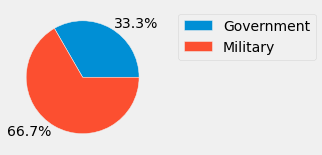

In [282]:
#Israel: Exports By Sector
pie_chart(isr_exp_users_table, 2.2,1)

In [283]:
#Israel exports by contractor
isr_exp_cont_table

Country of Contractor,Israel Aerospace Industries (IAI),Israel Aircraft Industries (IAI)
Israel,2,1


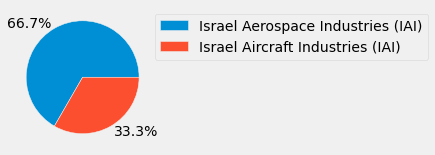

In [284]:
#Israel: Exports By Contractor
pie_chart(isr_exp_cont_table, 3,1)

# ITALY

In [462]:
#Italy: import/export analysis

ita_imp_users_table = imp_users_table_getter("Italy")
ita_exp_users_table = exp_users_table_getter("Italy")
ita_imp_cont_table = imp_cont_table_getter("Italy")
ita_exp_cont_table = exp_cont_table_getter("Italy")

#Italy imports by sector
ita_imp_users_table

Country of Contractor,Civil,Military,Military/Civil
France/Italy,0,0,1
Israel,0,1,0
Italy/Germany,1,0,0


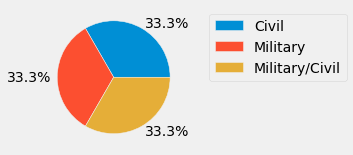

In [288]:
#Italy: Import by Sector
pie_chart(ita_imp_users_table, 2.2,1)

In [289]:
#Italy imports by contractor
ita_imp_cont_table

Country of Contractor,Israel Aerospace Industries (IAI),Thales Alenia Space,Two high schools and OHB System AG
France/Italy,0,1,0
Israel,1,0,0
Italy/Germany,0,0,1


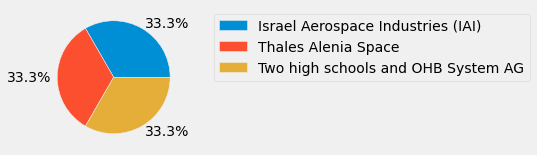

In [290]:
#Italy: Imports By Contractor
pie_chart(ita_imp_cont_table, 3.5,1)

In [291]:
#Italy exports by sector
ita_exp_users_table

Country of Contractor,Civil,Commercial,Government
Italy,2,26,1


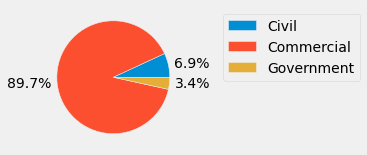

In [294]:
#Italy: Exports By Sector
pie_chart(ita_exp_users_table, 2.3,1)

In [295]:
#Italy exports by contractor
ita_exp_cont_table

Country of Contractor,Carlo Gavazzi Space (CGS) working with network of universities,La Sapienza University of Rome,Thales Alenia Space,Thales Alenia Space Italia
Italy,1,1,26,1


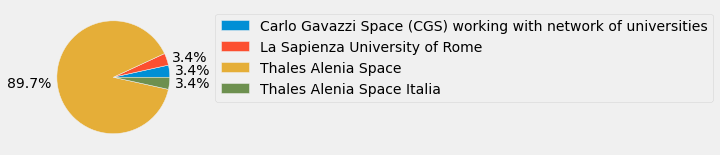

In [297]:
#Italy: Exports By Contractor
pie_chart(ita_exp_cont_table, 4.8,1)

# JAPAN

In [298]:
#Japan: import/export analysis

jap_imp_users_table = imp_users_table_getter("Japan")
jap_exp_users_table = exp_users_table_getter("Japan")
jap_imp_cont_table = imp_cont_table_getter("Japan")
jap_exp_cont_table = exp_cont_table_getter("Japan")

#Japan imports by sector
ita_imp_users_table

Country of Contractor,Civil,Military,Military/Civil
France/Italy,0,0,1
Israel,0,1,0
Italy/Germany,1,0,0


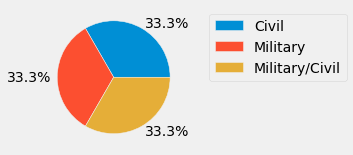

In [299]:
#Japan: Imports By Sector
pie_chart(ita_imp_users_table, 2.2, 1)

In [301]:
#Japan imports by contractor
jap_imp_cont_table

Country of Contractor,Boeing Satellite Systems,Lockheed Martin Commercial Space Systems,Maxar Technologies,PHL Microsat,Space Systems/Loral
Philippines,0,0,0,1,0
USA,2,8,1,0,4


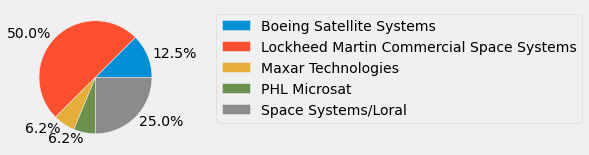

In [302]:
#Japan: Imports By Contractor
pie_chart(jap_imp_cont_table, 4,1)

In [303]:
#Japan exports by sector
jap_exp_users_table

Country of Contractor,Civil,Commercial,Government,Military/Commercial
Japan,1,3,2,1


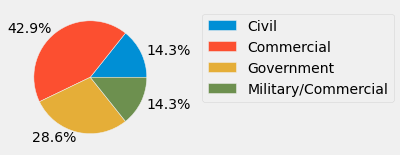

In [306]:
#Japan: Exports By Sector
pie_chart(jap_exp_users_table, 2.7,1)

In [307]:
#Japan exports by contractor
jap_exp_cont_table

Country of Contractor,Japan Aerospace Exploration Agency (JAXA),Kyushu Institute of Technology,Kyushu Institute of Technology (KIT),Mitsubishi Electric,Mitsubishi Electric
Japan,1,1,1,2,2


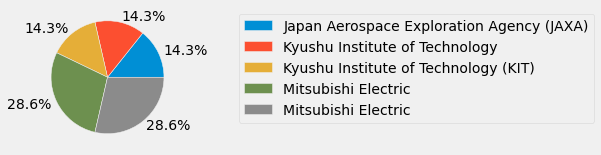

In [308]:
#Japan: Exports By Contractor
pie_chart(jap_exp_cont_table, 4,1)

# LUXEMBOURG

In [849]:
#Luxembourg: import/export analysis

lux_imp_users_table = imp_users_table_getter("Luxembourg")
lux_exp_users_table = exp_users_table_getter("Luxembourg")
lux_imp_cont_table = imp_cont_table_getter("Luxembourg")
lux_exp_cont_table = exp_cont_table_getter("Luxembourg")

#Luxembourg imports by sector
lux_imp_users_table = lux_imp_users_table.drop(1,2).with_columns("Commercial", make_array(4,7,1,1,18,1))
lux_imp_users_table

Country of Contractor,Government/Military,Commercial
France,0,4
France/United Kingdom/Germany,0,7
France/United Kingdom/Germany/Spain,0,1
Germany/France,0,1
USA,1,18
United Kingdom,0,1


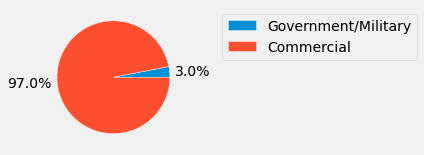

In [368]:
#Luxembourg imports by sector
pie_chart(lux_imp_users_table, 2.7,1)

In [369]:
#Luxembourg imports by contractor
lux_imp_cont_table

Country of Contractor,Airbus Defense and Space,Astrium,Boeing Satellite Systems,EADS Astrium,Hughes Space and Communications Co.,Lockheed Martin Commercial Space Systems,Orbital ATK,Orbital Sciences Corp.,Space Systems/Loral,Thales Alenia Space
France,0,0,0,4,0,0,0,0,0,0
France/United Kingdom/Germany,4,1,0,2,0,0,0,0,0,0
France/United Kingdom/Germany/Spain,0,0,0,1,0,0,0,0,0,0
Germany/France,1,0,0,0,0,0,0,0,0,0
USA,0,0,5,0,5,2,1,4,2,0
United Kingdom,0,0,0,0,0,0,0,0,0,1


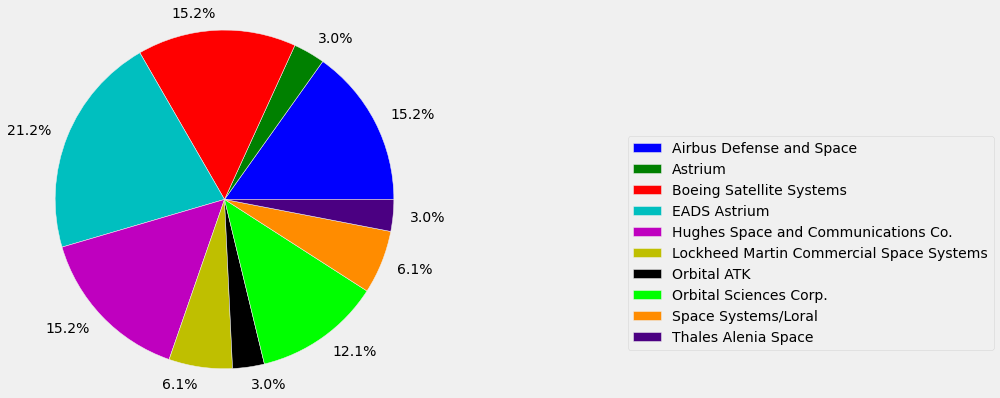

In [850]:
#Luxembourg imports by contractor
pie_chart(lux_imp_cont_table, 6,1)

In [371]:
#Luxembourg exports by sector
lux_exp_users_table

Country of Contractor,Government
Luxembourg,1


In [320]:
#Luxembourg exports by contractor
lux_exp_cont_table

Country of Contractor,LuxSpace
Luxembourg,1


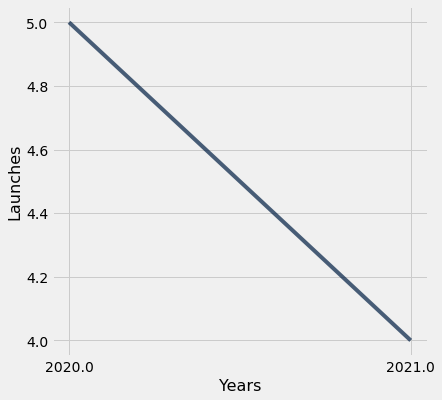

In [381]:
#Luxembourg: Launches vs. Time for Space Objects produced in Luxembourg. Can denote domestic-use or exported products.
launch_plot_nonzero("Luxembourg")

Country of Operator/Owner,Communications,Earth Observation
Luxembourg,33,8


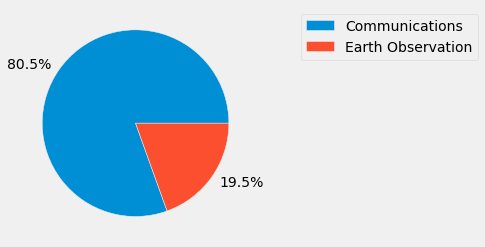

In [383]:
#Luxembourg (sovereign authority) satellite usage breakdown
lux = purp_table_getter("Luxembourg")
lux.show()
pie_lux = lux.drop("Country of Operator/Owner")
plots.pie(x=pie_lux.row(0),labels=labels_2(lux))
plots.legend(labels=pie_lux.labels,loc='upper right', bbox_to_anchor=(2,1))

# NETHERLANDS

In [321]:
#Netherlands: import/export analysis

neth_imp_users_table = imp_users_table_getter("Netherlands")
neth_exp_users_table = exp_users_table_getter("Netherlands")
neth_imp_cont_table = imp_cont_table_getter("Netherlands")
neth_exp_cont_table = exp_cont_table_getter("Netherlands")

#Netherlands imports by sector
neth_imp_users_table

Country of Contractor,Civil,Commercial
France,0,1
USA,0,6
United Kingdom/Netherlands,1,0


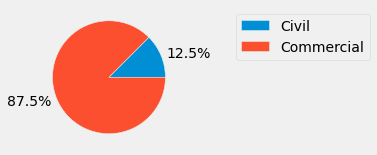

In [324]:
#Netherlands: Imports By Sector
pie_chart(neth_imp_users_table, 2.4,1)

In [325]:
#Netherlands imports by contractor
neth_imp_cont_table

Country of Contractor,AMSAT/UK-AMSAT/NL,Alcatel Space Industries,Lockheed Martin Commercial Space Systems,Orbital Sciences Corp.,Space Systems/Loral
France,0,1,0,0,0
USA,0,0,4,1,1
United Kingdom/Netherlands,1,0,0,0,0


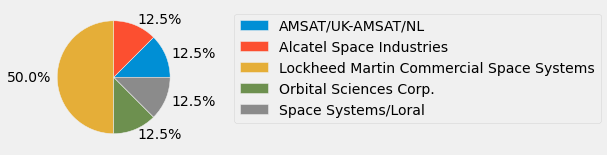

In [328]:
#Netherlands: Imports By Contractor
pie_chart(neth_imp_cont_table, 4,1)

In [329]:
#Netherlands exports by sector
neth_exp_users_table

Country of Contractor,Commercial,Military
Netherlands,2,2


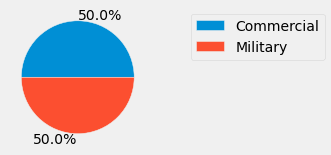

In [331]:
#Netherlands: Exports By Sector
pie_chart(neth_exp_users_table, 2.3,1)

In [332]:
#Netherlands exports by contractor
neth_exp_cont_table

Country of Contractor,Innovative Solutions in Space,Innovative Solutions in Space BV
Netherlands,2,2


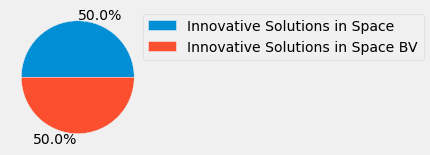

In [334]:
#Netherlands: Exports By Contractor
pie_chart(neth_exp_cont_table, 3,1)

# NORWAY

In [600]:
#Norway: import/export analysis

nor_imp_users_table = imp_users_table_getter("Norway")
nor_exp_users_table = exp_users_table_getter("Norway")
nor_imp_cont_table = imp_cont_table_getter("Norway")
nor_exp_cont_table = exp_cont_table_getter("Norway")

#Norway has no recorded exports

Country of Contractor,Commercial,Government
Canada,0,1
France/Italy,1,0
Norway/Canada,0,1
USA,2,0


## Norway imports by sector

In [601]:
nor_imp_users_table

Country of Contractor,Commercial,Government
Canada,0,1
France/Italy,1,0
Norway/Canada,0,1
USA,2,0


## Norway: Imports By Sector

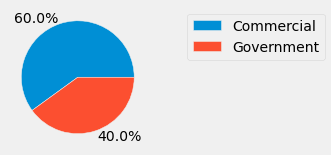

In [336]:
pie_chart(nor_imp_users_table,2.3,1)

## Norway imports by contractor

In [337]:
#Norway imports by contractor
nor_imp_cont_table

Country of Contractor,Kongsberg Seatex AS/University of Toronto Institute for Aerospace Studies,Orbital Sciences Corp.,Space Systems/Loral,Thales Alenia Space
Canada,1,0,0,0
France/Italy,0,0,0,1
Norway/Canada,1,0,0,0
USA,0,1,1,0


## Norway: Imports By Contractor

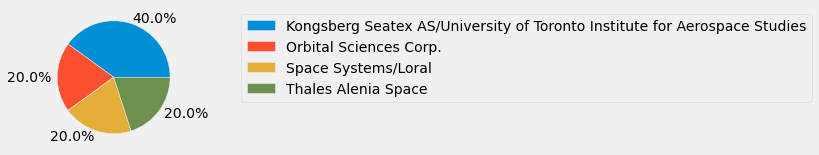

In [342]:
pie_chart(nor_imp_cont_table, 5.5,1)

## Norway: Launches vs. Time for Space Objects produced in Norway. Can denote domestic-use or exported products.

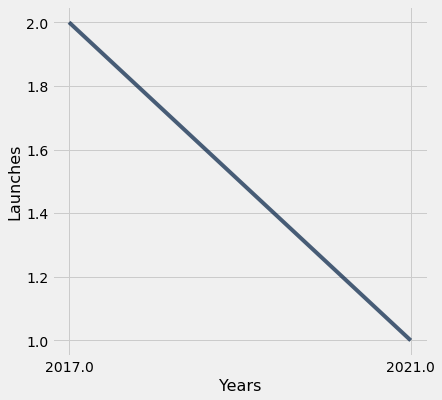

In [384]:
launch_plot_nonzero("Norway")

## Norway (sovereign authority) satellite usage breakdown

Country of Operator/Owner,Communications,Earth Observation,Earth Science/Earth Observation
Norway,5,2,1


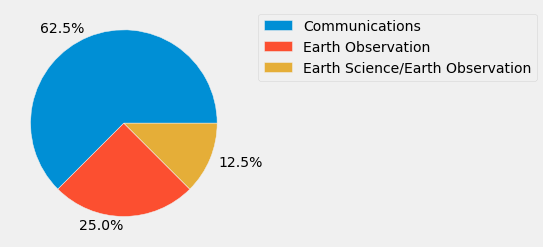

In [387]:
nor = purp_table_getter("Norway")
nor.show()
pie_nor = nor.drop("Country of Operator/Owner")
plots.pie(x=pie_nor.row(0),labels=labels_2(nor))
plots.legend(labels=pie_nor.labels,loc='upper right', bbox_to_anchor=(2.3,1))

## Norway's Sovereign Capabilities by Contractor

In [598]:
Nor_cap_piv = Sat_Table.where("Country of Operator/Owner", are.containing("Norway")).pivot("Contractor", "Purpose").show()

Purpose,Kongsberg Seatex AS/University of Toronto Institute for Aerospace Studies,Norwegian Space Center,Orbital Sciences Corp.,Space Systems/Loral,Thales Alenia Space
Communications,2,0,1,1,1
Earth Observation,0,2,0,0,0
Earth Science/Earth Observation,0,1,0,0,0


## NEW ZEALAND has no recorded imports/exports

# POLAND

In [343]:
#Poland import/export analysis

pol_exp_users_table = exp_users_table_getter("Poland")
pol_exp_cont_table = exp_cont_table_getter("Poland")

#Poland had no recorded imports 

#Poland exports by sector
pol_exp_users_table

Country of Contractor,Government
Poland,1


In [344]:
#Poland exports by contractor
pol_exp_cont_table

Country of Contractor,"Space Research Center, Polish Academy of Sciences"
Poland,1


## ROMANIA has no recorded imports/exports

# SOUTH KOREA

In [123]:
#South Korea: import/export analysis

skor_imp_users_table = imp_users_table_getter("South Korea").take(make_array(0,1,3,4)).drop("Civil")
skor_exp_users_table = exp_users_table_getter("South Korea")
skor_imp_cont_table = imp_cont_table_getter("South Korea").take(make_array(0,1,3,4)).drop(2)
skor_exp_cont_table = exp_cont_table_getter("South Korea")

#South Korea imports by sector
skor_imp_users_table 

Country of Contractor,Commercial,Government/Commercial,Military,Military/Commercial
France/Italy,2,0,0,1
France/United Kingdom/Germany/Spain,0,0,1,0
South Korea/France/United Kingdom/Germany,0,2,0,0
USA,1,0,0,0


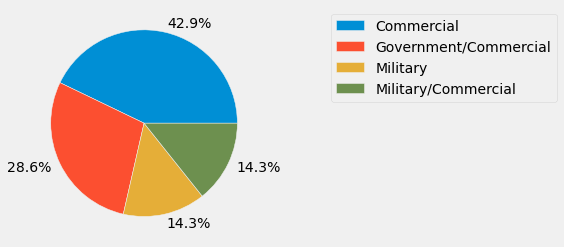

In [120]:
#South Korea: Imports By Sector
pie_chart(skor_imp_users_table, 2.3,1)

In [124]:
#South Korea imports by contractor
skor_imp_cont_table

Country of Contractor,Airbus Defense and Space,Korea Aerospace Research Institute (KARI)/ EADS Astrium,Orbital Sciences Corp.,Thales Alenia Space
France/Italy,0,0,0,3
France/United Kingdom/Germany/Spain,1,0,0,0
South Korea/France/United Kingdom/Germany,0,2,0,0
USA,0,0,1,0


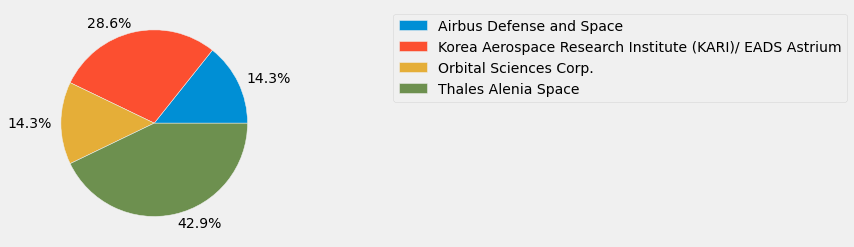

In [125]:
#South Korea: Imports By Contractor
pie_chart(skor_imp_cont_table, 3.5,1)

In [126]:
#South Korea exports by sector
skor_exp_users_table

Country of Contractor,Government
South Korea,2


In [127]:
#South Korea exportsby contractor
skor_exp_cont_table

Country of Contractor,Satrec Initiative
South Korea,2


# SPAIN

In [851]:
#Spain: import/export analysis

esp_imp_users_table = imp_users_table_getter("Spain")
esp_exp_users_table = exp_users_table_getter("Spain")
esp_imp_cont_table = imp_cont_table_getter("Spain")
esp_exp_cont_table = exp_cont_table_getter("Spain")

#Spain has no recorded exports

#Spain imports by sector
esp_imp_users_table

Country of Contractor,Commercial,Government,Government/Commercial/Military,Military,Military/Commercial,Military/Government
Denmark,2,0,0,0,0,0
France,0,0,1,0,0,0
France/United Kingdom/Germany/Spain,1,0,0,0,0,0
France/United Kingdom/Spain,0,0,0,0,1,0
Germany,1,0,0,0,0,0
South Korea,0,1,0,0,0,0
USA,5,0,0,1,0,1
United Kingdom,1,1,0,0,0,0


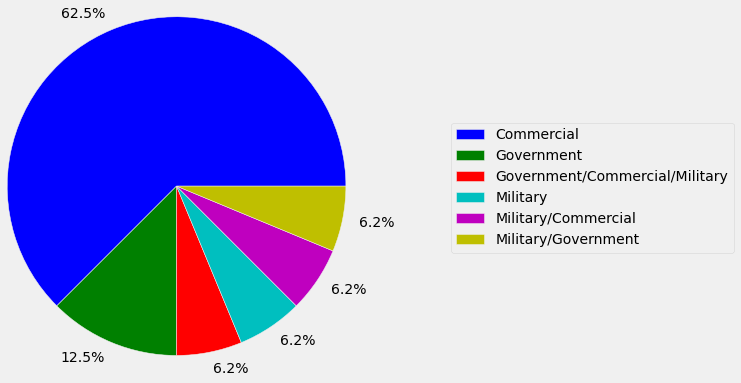

In [853]:
#Spain: Imports By Sector
pie_chart(esp_imp_users_table, 4.5,1)

In [854]:
#Spain imports by contractor
esp_imp_cont_table

Country of Contractor,Airbus Defense and Space,Alcatel Space Industries,EADS Astrium,GomSpace ApS,OHB System-AG,Open Cosmos,Orbital Sciences Corp.,Satrec Initiative,Space Systems/Loral,Surrey Satellite Technology Ltd.
Denmark,0,0,0,2,0,0,0,0,0,0
France,0,1,0,0,0,0,0,0,0,0
France/United Kingdom/Germany/Spain,0,0,1,0,0,0,0,0,0,0
France/United Kingdom/Spain,1,0,0,0,0,0,0,0,0,0
Germany,0,0,0,0,1,0,0,0,0,0
South Korea,0,0,0,0,0,0,0,1,0,0
USA,0,0,0,0,0,0,1,0,6,0
United Kingdom,0,0,0,0,0,1,0,0,0,1


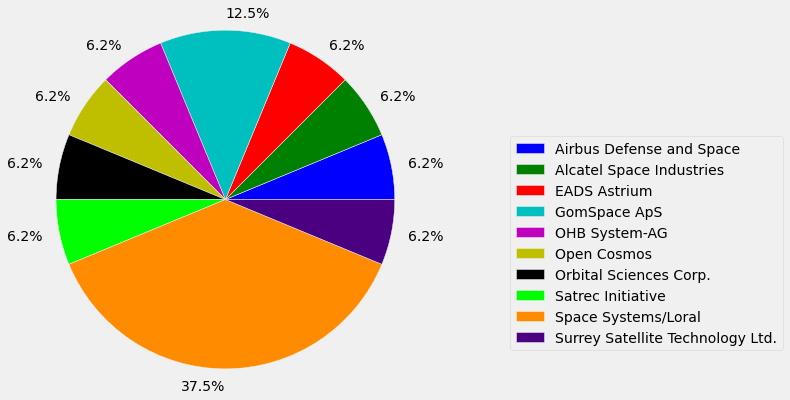

In [856]:
#Spain: Imports By Contractor
pie_chart(esp_imp_cont_table, 4.5,1)

# THAILAND

In [351]:
#Thailand: import/export analysis

thai_imp_users_table = imp_users_table_getter("Thailand")
thai_exp_users_table = exp_users_table_getter("Thailand")
thai_imp_cont_table = imp_cont_table_getter("Thailand")
thai_exp_cont_table = exp_cont_table_getter("Thailand")

#Thailand has no recorded exports

#Thailand imports by sector
thai_imp_users_table

Country of Contractor,Civil,Commercial,Government,Military
France,0,0,1,0
Germany,1,0,0,0
Netherlands,0,0,0,2
USA,0,3,0,0


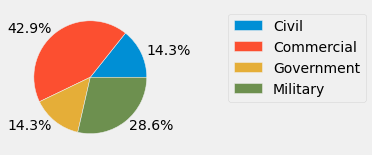

In [352]:
#Thailand: Imports By Sector
pie_chart(thai_imp_users_table, 2.5,1)

In [353]:
#Thailand imports by contractor
thai_imp_cont_table

Country of Contractor,EADS Astrium,German Orbital Systems,Innovative Solutions in Space,Orbital ATK,Orbital Sciences Corp.,Space Systems/Loral
France,1,0,0,0,0,0
Germany,0,1,0,0,0,0
Netherlands,0,0,2,0,0,0
USA,0,0,0,1,1,1


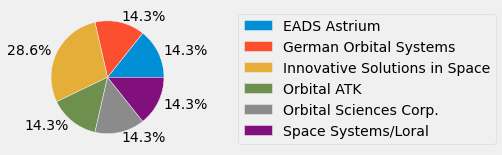

In [354]:
#Thailand: Imports By Contractor
pie_chart(thai_imp_cont_table, 3.3,1)

# UNITED KINGDOM

In [602]:
#United Kingdom: import/export analysis

uk_imp_users_table = imp_users_table_getter("United Kingdom")
uk_exp_users_table = exp_users_table_getter("United Kingdom")
uk_imp_cont_table = imp_cont_table_getter("United Kingdom")
uk_exp_cont_table = exp_cont_table_getter("United Kingdom")


Country of Contractor,Commercial,Military
Denmark,4,0
France,22,0
France/United Kingdom/Germany,3,4
France/United Kingdom/Germany/Spain,1,0
USA,292,0


## United Kingdom imports by sector

In [603]:
uk_imp_users_table

Country of Contractor,Commercial,Military
Denmark,4,0
France,22,0
France/United Kingdom/Germany,3,4
France/United Kingdom/Germany/Spain,1,0
USA,292,0


## United Kingdom: Imports By Sector

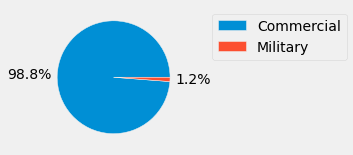

In [356]:
pie_chart(uk_imp_users_table, 2.2, 1)

## United Kingdom imports by contractor

In [482]:
uk_imp_cont_table

Country of Contractor,Airbus Defence and Space,Astrium,Boeing Corp.,EADS Astrium,GOMSpace,GomSpace ApS,Lockheed Martin Commercial Space Systems,OneWeb Satellites/Airbus,Orbital Sciences Corp.,Thales Alenia Space
Denmark,0,0,0,0,1,3,0,0,0,0
France,0,0,0,1,0,0,0,0,0,21
France/United Kingdom/Germany,0,2,0,5,0,0,0,0,0,0
France/United Kingdom/Germany/Spain,1,0,0,0,0,0,0,0,0,0
USA,0,0,4,0,0,0,2,284,2,0


## United Kingdom: Imports By Contractor

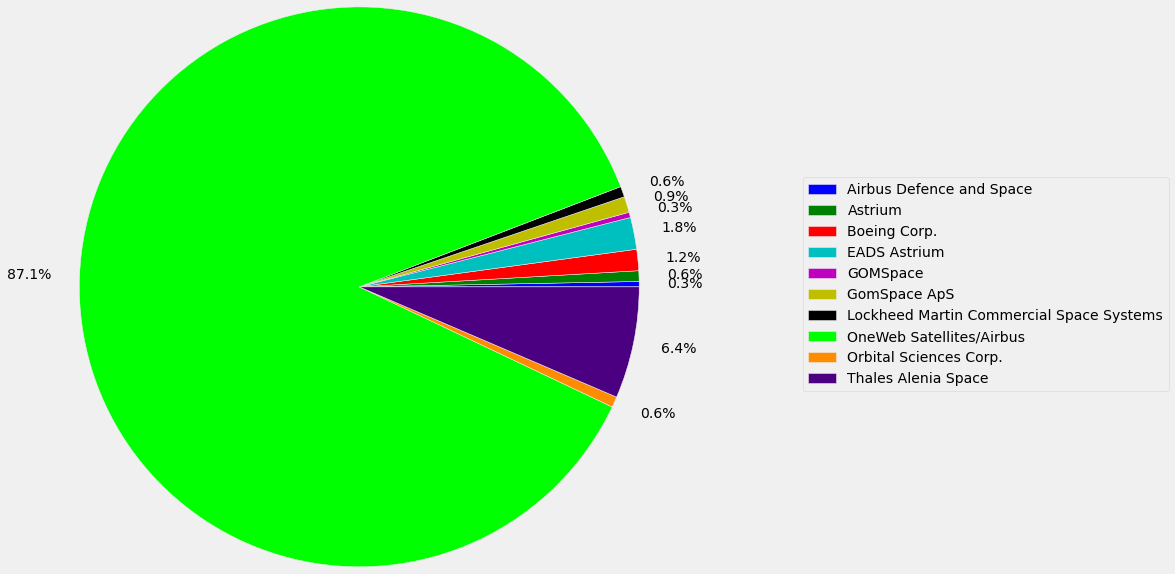

In [490]:
pie_chart(uk_imp_cont_table, 4, 1)

## United Kingdom exports by sector

In [359]:
uk_exp_users_table

Country of Contractor,Commercial,Government,Military
United Kingdom,11,13,4


## United Kingdom: Exports By Sector

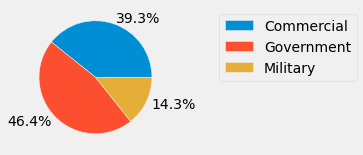

In [360]:
pie_chart(uk_exp_users_table, 2.4,1)

## United Kingdom exports by contractor

In [361]:
uk_exp_cont_table

Country of Contractor,Clyde Space,Maxar,Open Cosmos,Surrey Satellite Technology Ltd.,Surrey Satellite Technology Ltd.,Thales Alenia Space
United Kingdom,2,3,2,15,1,5


## United Kingdom: Exports By Contractor

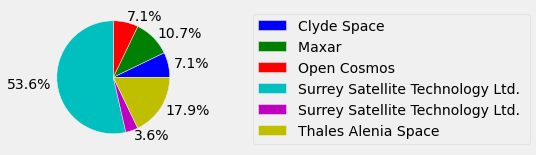

In [607]:
pie_chart(uk_exp_cont_table, 3.5,1)

## United Kingdom: Launches vs. Time for Space Objects produced in United Kingdom. Can denote domestic-use or exported products.

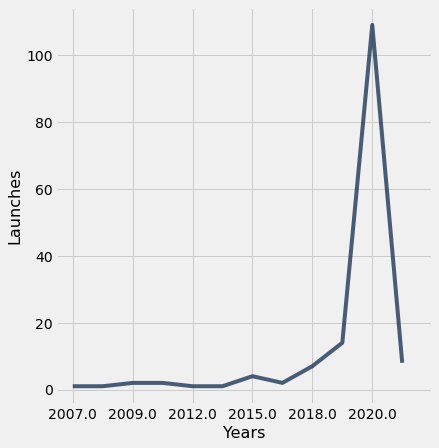

In [651]:
launch_plot_nonzero("United Kingdom")
united_k = plots.xticks(range(0,14,2))

## United Kingdom (sovereign authority) satellite usage breakdown

Country of Operator/Owner,Communications,Earth Observation,Platform,Space Science,Technology Development
United Kingdom,436,6,1,1,6


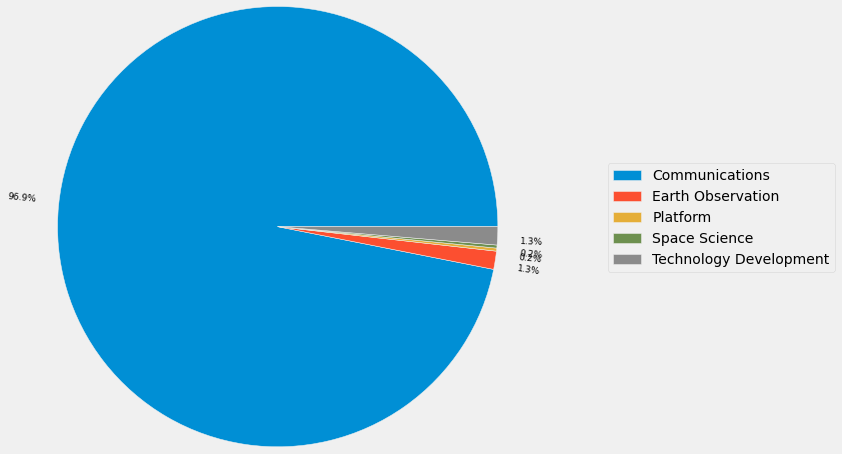

In [615]:
uk = purp_table_getter("United Kingdom")
uk.show()
pie_uk = uk.drop("Country of Operator/Owner")
plots.pie(x=pie_uk.row(0),labels=labels_2(uk),radius =3.9, textprops={'fontsize': 9}, rotatelabels = True)
plots.legend(labels=pie_uk.labels,loc='upper right', bbox_to_anchor=(4.5,1))

## United Kingdom's Sovereign Capabilities by Contractor

In [619]:
UK_cap_piv = Sat_Table.where("Country of Operator/Owner", are.containing("United Kingdom")).pivot("Contractor", "Purpose").show()

Purpose,Airbus Defence and Space,Astrium,Boeing Corp.,Clyde Space,EADS Astrium,GOMSpace,GomSpace ApS,Lockheed Martin Commercial Space Systems,OneWeb Satellites/Airbus,Open Cosmos,Orbital Sciences Corp.,Spectrum Astro (General Dynamics),Surrey Satellite Technologies Ltd./Airbus Defense and Space,Surrey Satellite Technology Ltd.,Surrey Satellite Technology Ltd.,Thales Alenia Space,University of Manchester
Communications,1,2,4,1,8,0,0,2,394,2,2,0,0,0,0,22,0
Communications/Technology Development,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Earth Observation,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0,0
Platform,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Space Science,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
Technology Development,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0


## United Kingdom's SPECIFIC Sovereign Capabilities by Contractor

In [618]:
UK_spec_cap_piv = Sat_Table.where("Country of Operator/Owner", are.containing("United Kingdom")).pivot("Contractor", "Detailed Purpose").show()

Detailed Purpose,Airbus Defence and Space,Astrium,Boeing Corp.,Clyde Space,EADS Astrium,GOMSpace,GomSpace ApS,Lockheed Martin Commercial Space Systems,OneWeb Satellites/Airbus,Open Cosmos,Orbital Sciences Corp.,Spectrum Astro (General Dynamics),Surrey Satellite Technologies Ltd./Airbus Defense and Space,Surrey Satellite Technology Ltd.,Surrey Satellite Technology Ltd.,Thales Alenia Space,University of Manchester
Internet of Things (IoT),0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0
Optical Imaging,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0
Radar Imaging,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
nan,1,3,4,0,8,1,3,2,394,0,2,1,0,3,0,22,1


# USA

In [857]:
#USA: import/export analysis

us_imp_users_table = imp_users_table_getter("USA")
us_exp_users_table = exp_users_table_getter("USA")
us_imp_cont_table = imp_cont_table_getter("USA")
us_exp_cont_table = exp_cont_table_getter("USA")

#USA imports by sector
us_imp_users_table

Country of Contractor,Civil,Commercial,Government,Government/Civil,Government/Commercial
Denmark/Canada,0,3,0,0,0
France,0,3,0,0,0
France/Italy,0,1,0,0,0
France/Italy/USA,0,0,0,0,75
Germany/France,0,1,0,0,0
Italy,0,24,0,0,0
USA/Italy,0,7,0,0,0
USA/Thales Alenia Space,0,7,0,0,0
USA/United Kingdom,1,0,0,0,0
United Kingdom,0,4,1,0,0


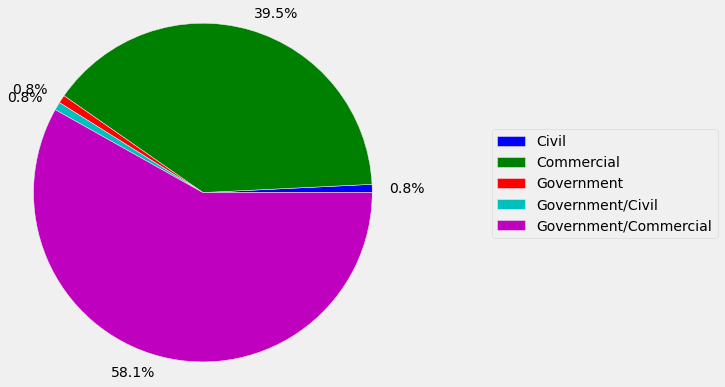

In [861]:
#USA: Imports By Sector
pie_chart(us_imp_users_table, 4.2,1)

In [862]:
#USA imports by contractor
us_imp_cont_table.show()

Country of Contractor,Airbus Defense and Space,Alcatel Space Industries,EADS Astrium,GomSpace/Unitas SFL,LeoStella,Maxar,Space Systems/Loral/Alenia Aerospazio,Surrey Satellite Technology Ltd.,Thales Alenia Space,Thales Alenia Space/Orbital ATK,"University of Colorado, Boulder",University of North Carolina/Clyde
Denmark/Canada,0,0,0,3,0,0,0,0,0,0,0,0
France,1,2,0,0,0,0,0,0,0,0,0,0
France/Italy,0,0,0,0,0,0,0,0,1,0,0,0
France/Italy/USA,0,0,0,0,0,0,0,0,0,75,0,0
Germany/France,1,0,0,0,0,0,0,0,0,0,0,0
Italy,0,0,0,0,0,0,0,0,24,0,0,0
USA/Italy,0,0,0,0,0,0,7,0,0,0,0,0
USA/Thales Alenia Space,0,0,0,0,7,0,0,0,0,0,0,0
USA/United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1
United Kingdom,0,0,0,0,0,3,0,2,0,0,0,0


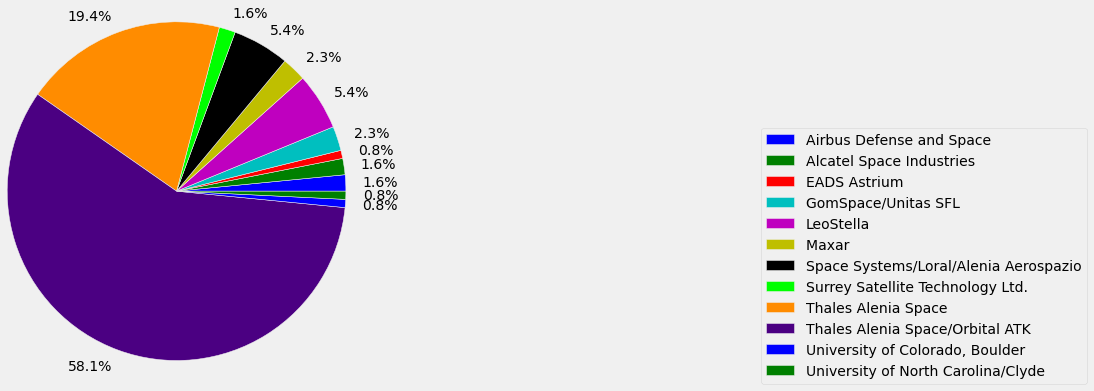

In [863]:
#USA: Imports by Contractor
pie_chart(us_imp_cont_table, 7,1)

In [864]:
#USA exports by sector
us_exp_users_table

Country of Contractor,Civil,Commercial,Commercial/Government,Government,Government/Civil,Government/Military,Military,Military/Commercial,Military/Government
USA,1,409,1,8,9,2,1,2,1


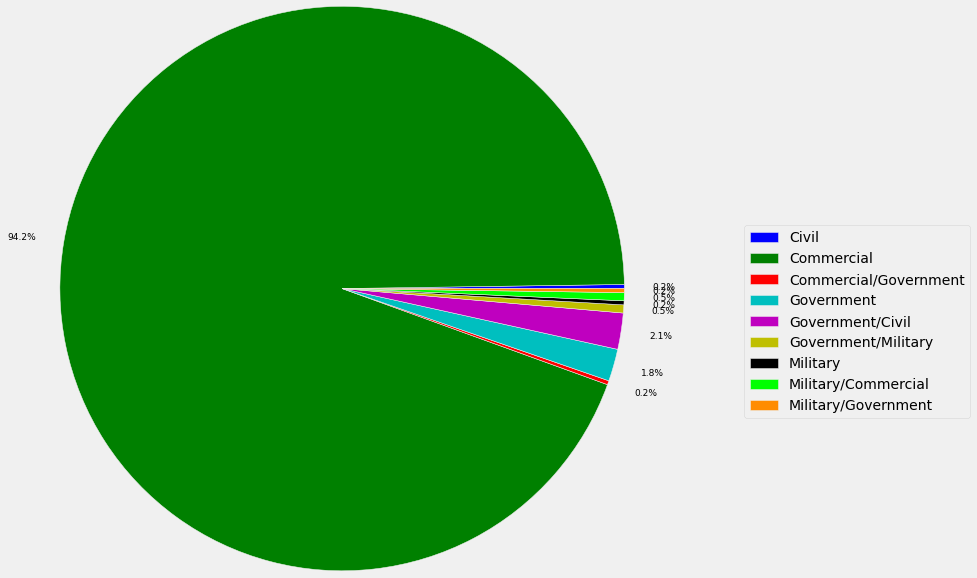

In [899]:
#USA: Exports By Sector
pie_chart(us_exp_users_table, 5,1)

In [866]:
#USA exports by contractor
us_exp_cont_table

Country of Contractor,Boeing,Boeing Corp.,Boeing Defense and Space,Boeing Satellite Systems,Hughes Space and Communications Co.,Hughes Space and Communications Co.,Lockheed Martin,Lockheed Martin Commercial Space Systems,Lockheed Martin Missiles & Space,Maxar,Maxar Technologies,NASA/Goddard Space Flight Center,Northrup Grumman Innovation Systems,OneWeb Satellites/Airbus,Orbital ATK,Orbital Sciences Corp.,Orbital Space,Pumpkin Space Systems,Space Systems/Loral,SpaceQuest,Spectrum Astro (General Dynamics),Swales Aerospace
USA,1,4,1,19,6,1,3,19,1,1,2,2,1,284,4,24,1,2,44,10,1,3


# CHINA

In [872]:
#China: import/export analysis

cn_imp_users_table = imp_users_table_getter("China")
cn_exp_users_table = exp_users_table_getter("China")
cn_imp_cont_table = imp_cont_table_getter("China")
cn_exp_cont_table = exp_cont_table_getter("China")

#China imports by sector
cn_imp_users_table

Country of Contractor,Commercial,Government,Government/Commercial
China,0,2,0
China/Austria,0,1,0
China/United Kingdom,1,0,0
France,0,2,0
France/Italy,1,0,1
USA,6,0,0
nan,0,1,0


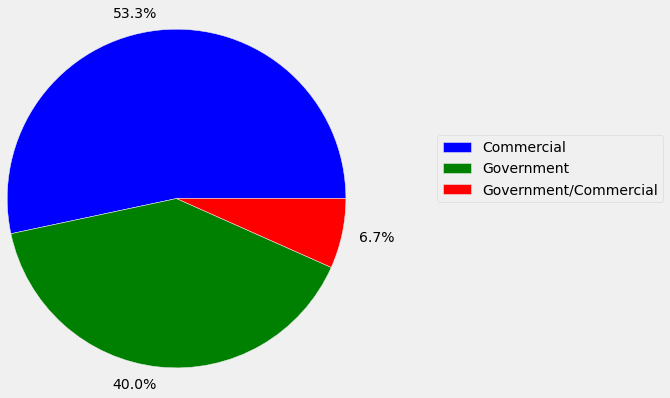

In [874]:
#China: Imports By Sector
pie_chart(cn_imp_users_table, 4,1)

In [875]:
#China imports by contractor
cn_imp_cont_table

Country of Contractor,Boeing Satellite Systems,China Academy of Space Technology (CAST),Chinese Academy of Sciences,Chinese Academy of Sciences/Austrian Academy of Sciences,Space Systems/Loral,Thales Alenia Space,Tsinghua University/University of Surrey,nan
China,0,1,1,0,0,0,0,0
China/Austria,0,0,0,1,0,0,0,0
China/United Kingdom,0,0,0,0,0,0,1,0
France,0,0,0,0,0,2,0,0
France/Italy,0,0,0,0,0,2,0,0
USA,1,0,0,0,5,0,0,0
nan,0,0,0,0,0,0,0,1


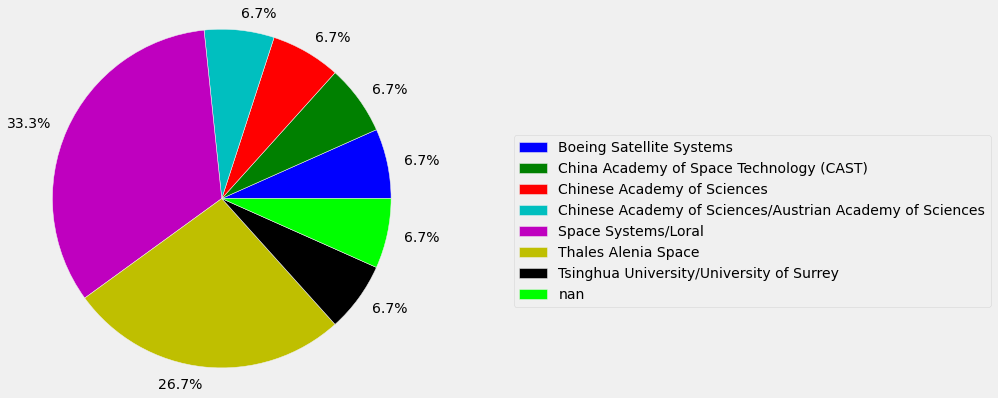

In [876]:
#China: Imports By Contractor
pie_chart(cn_imp_cont_table, 6,1)

In [389]:
#China exports by sector
cn_exp_users_table

Country of Contractor,Commercial,Government,Government/Commercial
China,7,11,1


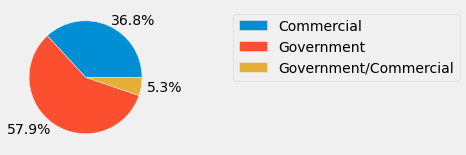

In [391]:
#China: Exports By Sector
pie_chart(cn_exp_users_table, 3.2,1)

In [877]:
#China exports by contractor
cn_exp_cont_table

Country of Contractor,CAST/DFH Satellite Co. Ltd.,China Academy of Space Technology (CAST),China Aerospace Science and Technology Corp. (CASC),Chinese Academy of Space Technology (CASC),"Innovation Academy for Microsatellites, Chinese Academy of Sciences","Shanghai Institute of Microsatellite Innovation, Chinese Academy of Sciences",Shenzhen Aerospace Oriental Red Sea Satellite Co.,Spacety Aerospace Co.
China,2,9,1,1,2,2,1,1


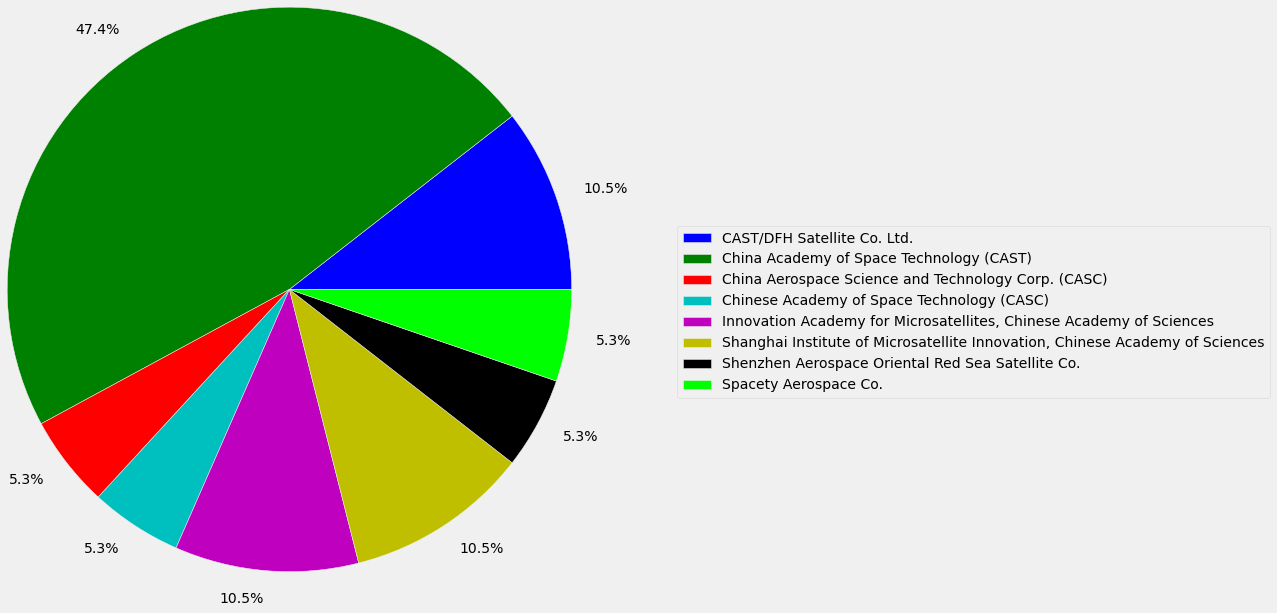

In [879]:
#China: Exports By Contractor
pie_chart(cn_exp_cont_table, 7.5,1)

# RUSSIA

In [880]:
#Russia: import/export analysis

ru_imp_users_table = imp_users_table_getter("Russia")
ru_exp_users_table = exp_users_table_getter("Russia")
ru_imp_cont_table = imp_cont_table_getter("Russia")
ru_exp_cont_table = exp_cont_table_getter("Russia")

#Russia imports by sector
ru_imp_users_table

Country of Contractor,Civil,Commercial,Government,Military
France,0,2,0,0
France/United Kingdom/Germany/Spain,0,2,0,0
Germany,1,0,0,0
Russia/France,0,3,1,0
Ukraine,0,0,0,1


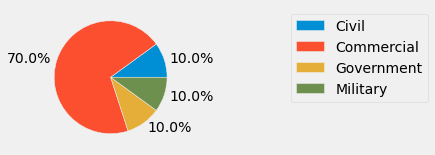

In [396]:
#Russia: Imports By Sector
pie_chart(ru_imp_users_table, 2.8,1)

In [881]:
#Russia imports by contractor
ru_imp_cont_table

Country of Contractor,Airbus Defense and Space,German Orbital Systems,ISS Reshetnev/Thales Alenia Space,KB Yuznoye,NPO-PM/Alcatel,NPO-PM/Thales Alenia Space,Thales,Thales Alenia Space
France,0,0,0,0,0,0,1,1
France/United Kingdom/Germany/Spain,2,0,0,0,0,0,0,0
Germany,0,1,0,0,0,0,0,0
Russia/France,0,0,1,0,1,2,0,0
Ukraine,0,0,0,1,0,0,0,0


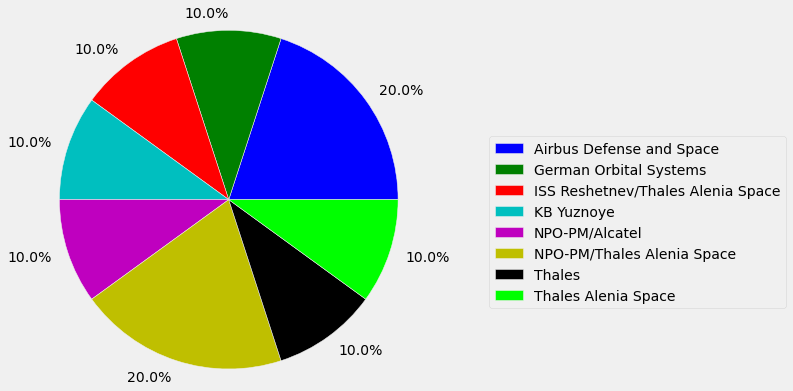

In [883]:
#Russia: Imports By Contractor
pie_chart(ru_imp_cont_table, 4.5,1)

In [399]:
#Russia exports by sector
ru_exp_users_table

Country of Contractor,Commercial,Government,Military
Russia,1,3,1


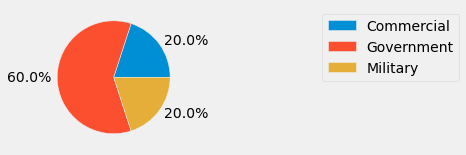

In [400]:
#Russia: Exports By Sector
pie_chart(ru_exp_users_table, 3,1)

In [401]:
#Russia exports by contractor
ru_exp_cont_table

Country of Contractor,Khrunichev,Lavochkin,NPO Mashinostroyeniya,NPO VNIIEM,RKK Energia
Russia,1,1,1,1,1


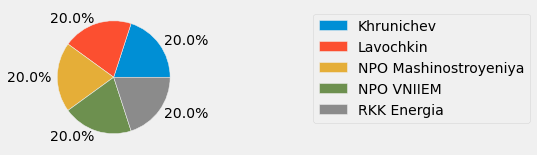

In [402]:
#Russia: Exports By Contractor
pie_chart(ru_exp_cont_table, 3.5,1)

# Predictive Launch Analytics (Forecasting)

In [894]:
year_array = make_array()
for i in Master_Table.column("Date of Launch"):
    if i == "nan":
        stat = "nan"
        year_array = np.append(year_array, stat)
    else:
        stat = int(np.array(i.split("/")).item(2))
        year_array = np.append(year_array, stat)
#For specific sector: .where("Users", are.containing(sector)) 
Master_Table_Dates = Master_Table.drop("Date of Launch").with_columns("Date of Launch", year_array)
Master_Table_Dates.show(10)

"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Expected Lifetime (yrs.),Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 28,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Country of Contractor,Date of Launch
1HOPSAT-TD (1st-generation High Optical Performance Sate ...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,0,566,576,0.000720357,36.9,96.08,22,nan,nan,0.5,Hera Systems,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation constellation.,nan,JMSatcat/3_20,https://spaceflightnow.com/2019/12/11/indias-50th-pslv-l ...,https://www.herasys.com/,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA,2019.0
Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,nan,LEO,Sun-Synchronous,0,497,517,0.00145,97.45,94.7,5,nan,4.5,2,Aalto University,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,nan,JMSatcat/10_17,https://directory.eoportal.org/web/eoportal/satellite-mi ...,nan,http://www.planet4589.org/space/log/satcat.txt,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Finland,2017.0
AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0,442,687,0.0177,98.2,95.9,1,nan,nan,nan,University of Aalborg,Guiana Space Center,Soyuz-2.1a,2016-025E,41460,Carries AIS system.,nan,Space50,http://spaceflightnow.com/2016/04/26/soyuz-blasts-off-wi ...,nan,http://space50.org/objekt.php?mot=2016-025E&jazyk=pp_en,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Denmark,2016.0
"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,75,"35,778","35,793",0.000178,0.08,1436.03,"6,330",nan,"16,000",15,Space Systems/Loral,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transponders. $214 ...",nan,ZARYA,http://www.absatellite.net/satellite-fleet/?sat=abs6,nan,http://www.zarya.info/Diaries/Launches/Launches.php?year ...,http://www.absatellite.net/2010/10/13/asia-broadcast-sat ...,http://www.spacenews.com/article/satellite-telecom/42218 ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA,2014.0
ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-75,"35,700","35,700",0,0,1436.1,"1,800",nan,nan,15,Boeing Satellite Systems,Cape Canaveral,Falcon 9,2016-038A,41588,nan,nan,Estimated,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA,2016.0
ABS-3A,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,nan,GEO,nan,-3,"35,788","35,803",0.000178,0.1,1436,"2,000",nan,nan,15,Boeing Satellite Systems,Cape Canaveral,Falcon 9,2015-010A,40424,Coverage of Americas Europe and Africa.,nan,nan,http://www.absatellite

In [895]:
New_Table = Master_Table_Dates.where("Users", are.contained_in(make_array("Military", "Government", "Military/Government", "Government/Military")))
New_Table.show(10)

"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Expected Lifetime (yrs.),Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unnamed: 28,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Source.6,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Country of Contractor,Date of Launch
Adelis-Sampson 1,Adelis-Sampson 1,NR,Israel,Asher Space Research Institute at Technion/Israeli Aircr ...,Government,Technology Development,nan,LEO,Sun-Synchronous,0,538,561,0.00166,97.5,95.5,9,nan,nan,nan,Asher Space Research Institute at Technion/Israeli Aircr ...,Baikonur Cosmodrome,Soyuz-2.1a,2021-022F,47937,Demonstrate long-term autonomous cluster flight of multi ...,nan,JMSatcat/5_21,https://asri.technion.ac.il/node/219,https://spacenews.com/soyuz-2-rideshare-launch-delayed-f ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Israel,2021.0
Adelis-Sampson 2,Adelis-Sampson 2,NR,Israel,Asher Space Research Institute at Technion/Israeli Aircr ...,Government,Technology Development,nan,LEO,Sun-Synchronous,0,539,599,0.00432,97.5,95.5,9,nan,nan,nan,Asher Space Research Institute at Technion/Israeli Aircr ...,Baikonur Cosmodrome,Soyuz-2.1a,2021-022H,47939,Demonstrate long-term autonomous cluster flight of multi ...,nan,JMSatcat/5_21,https://asri.technion.ac.il/node/219,https://spacenews.com/soyuz-2-rideshare-launch-delayed-f ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Israel,2021.0
Adelis-Sampson 3,Adelis-Sampson 3,NR,Israel,Asher Space Research Institute at Technion/Israeli Aircr ...,Government,Technology Development,nan,LEO,Sun-Synchronous,0,537,561,0.00173,97.5,95.5,9,nan,nan,nan,Asher Space Research Institute at Technion/Israeli Aircr ...,Baikonur Cosmodrome,Soyuz-2.1a,2021-022M,47943,Demonstrate long-term autonomous cluster flight of multi ...,nan,JMSatcat/5_21,https://asri.technion.ac.il/node/219,https://spacenews.com/soyuz-2-rideshare-launch-delayed-f ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Israel,2021.0
"Advanced Orion 10 (Mentor, NRO L-44, USA 311)",USA 311,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,nan,0,"35,700","35,800",0.00119,0,1437.6,"5,400",nan,nan,nan,National Reconnaissance Laboratory (?),Cape Canaveral,Delta 4 Heavy,2020-095A,47237,ELINT.,nan,Estimated,https://spaceflightnow.com/2020/12/11/delta-4-heavy-laun ...,nan,nan,nan,nan,nan,http://www.astronautix.com/a/advancedorion.html,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,USA,2020.0
"Advanced Orion 4 (Mentor, NROL 6, USA 139)",USA 139,USA,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,nan,-26,"35,560","36,013",0.00537,7.72,1436.14,"5,200",nan,nan,nan,TRW Space and Electronics,Cape Canaveral,Titan IVA,1998-029A,25336,ELINT.,nan,JM/12_08,http://www.sciencepresse.qc.ca/clafleur/Spacecrafts-1998 ...,nan,http://globalsecurity.org/space/library/report/2005/sate ...,http://www.msnbc.com/news/185953.asp#BODY,http://www.lib.cas.cz/www/space.40/1990/097B.HTM,nan,http://ww

In [707]:
Launch_by_Date = New_Table.pivot("Country of Operator/Owner", "Date of Launch")
Launch_by_Date.show()

Date of Launch,Algeria,Argentina,Azerbaijan,Bangladesh,Belarus,Bolivia,Brazil,Canada,Chile,China,China/Brazil,China/France,China/Italy,Colombia,Czech Republic,Denmark,ESA,ESA/USA,ESA/USA/Russia,Egypt,Ethiopia,France,France/Israel,France/Italy,France/Italy/Belgium/Spain/Greece,France/USA,Germany,India,India/Canada,India/France,Indonesia,Iran,Israel,Italy,Japan,Kazakhstan,Laos,Luxembourg,Malaysia,Mauritius,Mexico,Morocco,Morocco/Germany,Multinational,Netherlands,Nigeria,Norway,Pakistan,Paraguay,Peru,Russia,Saudi Arabia,Singapore,South Africa,South Korea,Spain,Sudan,Sweden,Taiwan,Taiwan/USA,Thailand,Turkey,USA,USA/Canada/Japan,USA/France,USA/Germany,USA/Japan,USA/Japan/Brazil,USA/Sweden,United Arab Emirates,United Kingdom,Venezuela,Vietnam
1988.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1989.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1992.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1993.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1994.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1995.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1996.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1997.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
1998.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


# Some EDA data visualization code

In [948]:
#The x-axis measures years after 1988

def launch_plot(country):
    x_column = np.arange(1, Launch_by_Date.num_rows + 1)
    y_column = Launch_by_Date.column(country)
    plot_table = Table().with_columns("Years since 1988", x_column, "Launches", y_column)
    return plot_table.plot("Years since 1988", "Launches")

def launch_scatter(country):
    x_column = np.arange(1, Launch_by_Date.num_rows + 1)
    y_column = Launch_by_Date.column(country)
    plot_table = Table().with_columns("Years since 1988", x_column, "Launches", y_column)
    return plot_table.scatter("Years since 1988", "Launches")

def launch_plot_nonzero(country):
    new_data = Launch_by_Date.where(country, are.not_equal_to(0)).select(0, country)
    x_column = new_data.column(0)
    y_column = new_data.column(1)
    plot_table = Table().with_columns("Years", x_column, "Launches", y_column)
    return plot_table.plot("Years", "Launches") and plots.xticks(range(0,22,8)) and plots.xlabel("Years")

def launch_scatter_nonzero(country):
    new_data = Launch_by_Date.where(country, are.not_equal_to(0)).select(0, country)
    x_column = new_data.column(0)
    y_column = new_data.column(1)
    plot_table = Table().with_columns("Years", x_column, "Launches", y_column)
    return plot_table.scatter("Years", "Launches")


In [711]:
#Last five elements in an array:

def last_five(array):
    last_five = make_array()
    for i in make_array(5,4,3,2,1):
        stat = array.item(len(array) - i)
        last_five = np.append(last_five, stat)
    return last_five

### last_five was previously implemented in old code (no longer is) and is being kept in final script for potential need in the future.

In [ ]:
#Using data for launches per year beginning after a Country's first recorded launch

def shortened_table(country):
    n = 0
    for i in Launch_by_Date.column(country):
        if i != 0:
            break
        else:
            n += 1
    return Launch_by_Date.select("Date of Launch", country).take(np.arange(n, Launch_by_Date.num_rows))


# Blueprint Model: Sampling from Segmented Means + St. Devs.

In [746]:
#First initiate working table
working_table = shortened_table("China")

#Compute forecast point function built with the intention of appendage 
def forecast_point(working_table, country):
    global_mean = np.mean(working_table.column(country))
    global_std = np.std(working_table.column(country))
    W_Q = working_table.num_rows
    H_table = working_table.where(country, are.above_or_equal_to(global_mean))
    H_mean = np.mean(H_table.column(country))
    H_Q = H_table.num_rows
    L_table = working_table.where(country, are.below(global_mean))
    L_mean = np.mean(L_table.column(country))
    L_Q = L_table.num_rows
    model_p = (L_Q/W_Q, H_Q/W_Q)
    select = sample_proportions(1, model_p)
    return round(select.item(0)*L_mean + select.item(1)*H_mean + global_std)

# The Real Predictor: Using Moving Averages to Predict Launch Behavior

#### "Segmentor"

In [911]:
#Creates an array of segmented indicies into groups of 4. Appends the last index if it is not already in array
#Arg for this function must be a table in the form output of shortened_table(country)
def seg_sim_array(tbl):
    data = np.arange(0,tbl.num_rows - 1, 4)
    new_data = np.append(data, tbl.num_rows)
    arr = Table().with_columns("Data", new_data).group("Data").column("Data")
    return arr


#### Predicts new data

In [918]:
#Computes the averages of segmented data (by index) and outputs an array of forecasted data 
#Arg for this function must be a table in the form output of shortened_table(country)
def seg_sim(tbl):
    indexer = seg_sim_array(tbl)
    means = make_array()
    for i in np.arange(len(seg_sim_array(tbl))-1):
        stat = np.mean(tbl.take(np.arange(indexer.item(i), indexer.item(i+1))).column(1))
        means = np.append(means, stat)
    new_mean = means.item(len(means)-1) + np.round(int(np.mean(np.diff(means))))
    moving_std = np.round(int(np.std(np.diff(means))))
    sampling_arr = np.arange(new_mean - (2*moving_std), (new_mean + (2*moving_std)) + 1, 1)
    return np.random.choice(sampling_arr, 5)


#### Generates table with newly predicted data for desired amount of years into the future

In [920]:
#Predicts future data by calculating a moving average (mean of np.diff(seg_sim(country))) and 
#np.std(np.diff(seg_sim(country))), adding moving ave to most recent segmented ave and drawing len(segment) number of
#random selections from [new ave ± 2*std] to yield predicted data. 
#new predictions along with new years are added to shortened_table(country), which is initially assigned to a variable

#This process is repeated in order to continually update moving average and std based on forecasted data

def master_sim(tbl, segs):
    country = np.array(tbl.labels)[1]
    for i in np.arange(segs):
        new_launch_data = seg_sim(tbl)
        col_0 = tbl.column(0)
        col_1 = tbl.column(1)
        for i in np.arange(1, len(new_launch_data)+1):
            stat_0 = str((float(col_0.item(len(col_0) -1))) + 1)
            col_0 = np.append(col_0, stat_0)
            stat_1 = new_launch_data.item(i-1)
            col_1 = np.append(col_1, stat_1)
        tbl = Table().with_columns("Date of Launch", col_0, country, col_1)
    return tbl


# Error Analysis: Measuring Model Against Historical Data (Chopping "Training")

### For this predictive model, percent error is calculated by taking the sum of launches for a country over the last three years and comparing that actual sum to my model's predictive sum of launches over the last three years (in a percent error calculation). 

In [921]:
def master_percent_error(tbl):
    country = np.array(tbl.labels)[1]
    working_tbl = tbl.take(np.arange(0, tbl.num_rows - 3))
    last_ind = master_sim(working_tbl, 1).num_rows - 1
    test_data = master_sim(working_tbl, 1).take(last_ind - 4, last_ind - 3, last_ind - 2).column(country)
    data_1 = sum(test_data)
    data_2 = sum(tbl.take(tbl.num_rows - 1, tbl.num_rows - 2, tbl.num_rows - 3).column(country))
    return abs(data_1 - data_2)/data_2


# Simulating future data 3000 times and calculating (and plotting) percent error for China:

0.161091168091
0.0382547093673


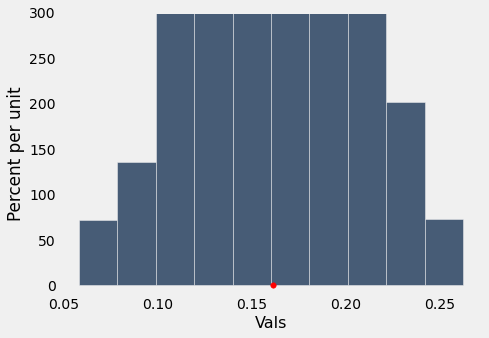

In [922]:
hist_array = make_array()    
for i in np.arange(3000):
    stat = master_percent_error(shortened_table("China"))
    hist_array = np.append(hist_array, stat)

hist_table = Table().with_columns("Vals", hist_array)
mean_ave_error = np.mean(hist_array)
hist_table.hist()
plots.scatter(mean_ave_error, 0, color='red', s=30)
plots.ylim(-0.1, 3)

print(mean_ave_error)
print(np.std(hist_array))

### Model is reading an average percent error of approximatley 16% and a standard deviation (in percent error) of approximately 4%

# Simulating future data 3000 times and calculating (and plotting) percent error for USA:

0.193786069652
0.0667027820421


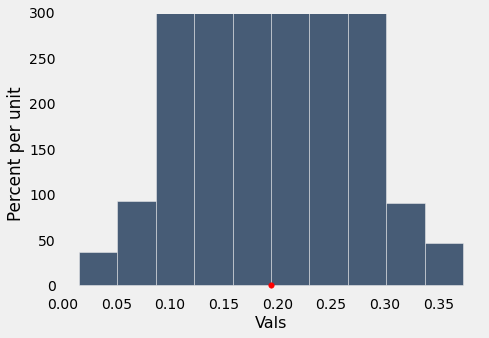

In [923]:
hist_array = make_array()    
for i in np.arange(3000):
    stat = master_percent_error(shortened_table("USA"))
    hist_array = np.append(hist_array, stat)

hist_table = Table().with_columns("Vals", hist_array)
mean_ave_error = np.mean(hist_array)
hist_table.hist()
plots.scatter(mean_ave_error, 0, color='red', s=30)
plots.ylim(-0.1, 3)

print(mean_ave_error)
print(np.std(hist_array))

### Model is reading an average percent error of approximatley 19% and a standard deviation (in percent error) of approximately 7%

# ----------

# Database Description

### The Government budget appropriations or outlays for R&D includes statistics on Government appropriations or outlays of R&D by socio-economic objective (SEO), using the NABS 2007 classification i.e: exploration and exploitation of the earth, environment, exploration and exploitation of space, transport, telecommunication and other infrastructures, energy, industrial production and technology, health, agriculture, education, culture, recreation, religion and mass media, political and social systems, structures and processes, general advancement of knowledge: R&D financed from General University Funds (GUF), General advancement of knowledge: R&D financed from sources other than GUF, Defence. Data are presented from 1981 onwards and expressed in units of expenditure in million of national currency, million of dollars in constant prices as well as current prices.

In [937]:
Tab = Table().read_table("GBARD_NABS2007-2019-1-EN-20200330T100119.csv").where("SEO", are.equal_to("NABS03")).where("MEASURE", are.equal_to("DF6"))


#Function to Return the R&D outlays for the exploration and exploitation of space over time (in 2015 USD$):

def rd_2015(ctn):
    print(ctn)
    return Tab.where("Country", are.equal_to(ctn)).select("Year", "Value")
    
def first(arr):
    return arr.item(0) #Gets the first element in an array

def last(arr):
    return arr.item(len(arr)-1) #Gets the last element in an array

Tab.select("Country", "Year").group("Country", first).sort("Year first").show()


Country,Year first
Austria,1981
Belgium,1981
Canada,1981
Denmark,1981
Finland,1981
France,1981
Germany,1981
Greece,1981
Ireland,1981
Italy,1981


### From the above table, we can see that the investment data for R&D space outlays (DF6) have different starting points. Let us consdier the countries with more prominent space capabilities. To include Luxembourg, we will study countries with DF6 data existing for the year 2000 and beyond. 

In [1290]:
Working_Table = Tab.where("Year", are.above_or_equal_to(2000)).where("Country", are.not_contained_in(make_array("Iceland", "Slovak Republic", "Latvia")))
Working_Table.show(10)

COUNTRY,Country,SEO,Socio economic objective,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2000,2000,USD,US Dollar,6,Millions,2015,2015,7.342,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2001,2001,USD,US Dollar,6,Millions,2015,2015,7.087,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2002,2002,USD,US Dollar,6,Millions,2015,2015,4.509,B; D,Break; Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2003,2003,USD,US Dollar,6,Millions,2015,2015,5.361,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2004,2004,USD,US Dollar,6,Millions,2015,2015,4.566,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2005,2005,USD,US Dollar,6,Millions,2015,2015,0,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2006,2006,USD,US Dollar,6,Millions,2015,2015,3.834,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2007,2007,USD,US Dollar,6,Millions,2015,2015,3.739,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2008,2008,USD,US Dollar,6,Millions,2015,2015,4.621,D,Difference in methodology
AUS,Australia,NABS03,Exploration and exploitation of space,DF6,2015 Dollars - Constant prices and PPPs,2009,2009,USD,US Dollar,6,Millions,2015,2015,54.206,D,Difference in methodology


In [926]:
#Creating an analytics table (manually instead of with df.describe()):

def analytics_table():
    function_array = make_array(min, max, np.mean, np.std)
    Stat_Table = Working_Table.select("Country").group("Country").drop("count")
    for i in function_array:
        stat_col = Working_Table.select("Country", "Value").group("Country", i)
        Stat_Table = Stat_Table.join("Country", stat_col)
    new_stat_col = Working_Table.select("Country", "Year").group("Country", last)
    return Stat_Table.join("Country", new_stat_col)

Stat_Table_NABS03 = analytics_table()
Stat_Table_NABS03.show()

Country,Value min,Value max,Value mean,Value std,Year last
Argentina,36.715,220.598,114.656,70.7752,2012
Australia,0,57.705,20.2645,17.5264,2019
Austria,2.011,32.656,15.4379,10.9485,2019
Belgium,220.481,380.38,274.706,32.5248,2018
Canada,210.885,424.189,307.241,54.2415,2016
Chile,5.329,17.089,11.6446,3.87368,2017
Chinese Taipei,116.471,252.398,178.489,33.4584,2019
Czech Republic,6.512,42.222,26.9952,13.3221,2019
Denmark,17.154,48.278,35.5628,6.76875,2019
Estonia,0,10.576,3.11741,2.94224,2018


In [927]:
#Analysis table for NABS04 (transport, telecomm, and other infrastructures)

Tab = Table().read_table("GBARD_NABS2007-2019-1-EN-20200330T100119.csv").where("SEO", are.equal_to("NABS04")).where("MEASURE", are.equal_to("DF6"))
Tab.select("Country", "Year").group("Country", first).sort("Year first")
Working_Table = Tab.where("Year", are.above_or_equal_to(2000)).where("Country", are.not_contained_in(make_array("Iceland", "Slovak Republic", "Latvia")))

analytics_table().show()

Country,Value min,Value max,Value mean,Value std,Year last
Argentina,6.313,50.813,20.4536,16.6054,2012
Australia,36.201,98.762,69.2008,20.2903,2019
Austria,28.544,61.352,40.6299,8.23317,2019
Belgium,12.701,68.753,40.153,18.2017,2018
Canada,181.114,290.929,224.072,22.6837,2016
Chile,9.806,27.106,17.6426,7.01152,2017
Chinese Taipei,132.243,427.891,241.392,61.0365,2019
Czech Republic,44.392,113.304,72.2537,18.663,2019
Denmark,2.418,33.795,18.8913,7.97045,2019
Estonia,3.147,33.544,13.6862,7.98902,2018


In [ ]:
!pip install scipy
import scipy
from scipy import linalg

[-0.04143888  0.02320098]


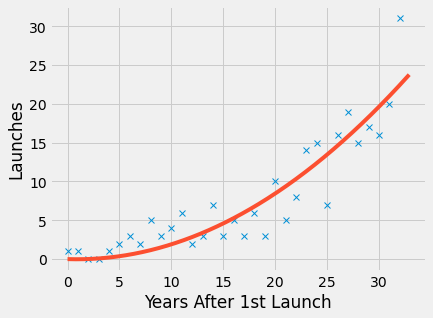

In [957]:
#Least Squares Regression using SciPy to fit a quadratic model a*x + b*x**2 to launch data.

#Using fitted curve to further analyze how sector spcecfic R&D outlays are correlated to launch data.

#LSR for USA Launch Data 

init = shortened_table("USA")
xx = np.arange(0, init.num_rows, 1)
yy = init.column(1)
A = np.c_[xx[:, np.newaxis], (xx**2)[:, np.newaxis]]

c, resid, rank, sigma = linalg.lstsq(A, yy)
xx2 = np.arange(0, init.num_rows, 0.1)
yy2 = c[0]*xx2 + c[1]*xx2**2

reg = plots.plot(xx,yy,'x',xx2,yy2)
plots.xlabel('Years After 1st Launch')
plots.ylabel('Launches')

print(c)

0.34676328036846527

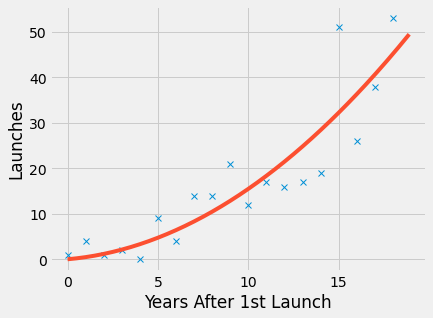

In [1288]:
def ls_reg(country):
    #x and y data for LS Matrix equation min|Ax - y|
    init = shortened_table(country)
    xx = np.arange(0, init.num_rows, 1)
    yy = init.column(1) 
    #Building "design matrix", A
    A = np.c_[xx[:, np.newaxis], (xx**2)[:, np.newaxis]]
    #Computing LS coefficeints
    c, resid, rank, sigma = linalg.lstsq(A, yy)
    xx2 = np.arange(0, init.num_rows, 0.1)
    yy2 = c[0]*xx2 + c[1]*xx2**2
    #Printing LS coefficients and plotting data with fitted curve 
    reg = plots.plot(xx,yy,'x',xx2,yy2)
    return c,reg and plots.xlabel('Years After 1st Launch') and plots.ylabel('Launches')
    
arr = ls_reg("China")
np.array(arr, dtype=object)[0].item(0)

2.2677716201516178

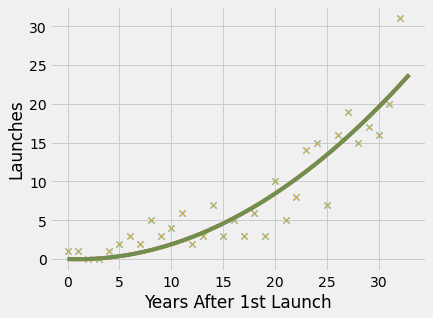

In [1289]:
#Regression Analysis: Mean Average Error

def mae_launch(country):
    #Collecting input, real output, model output, and fitted coefficeints to calculate mse
    init = shortened_table(country)
    xx = np.arange(0, init.num_rows, 1)
    yy = init.column(1)
    coeff = make_array(np.array(ls_reg(country), dtype=object)[0].item(0), np.array(ls_reg(country), dtype=object)[0].item(1))
    #Calculating mae
    yy_ls = coeff.item(0)*xx + coeff.item(1)*(xx**2)
    return np.mean(abs(yy - yy_ls))
     
mae_launch("USA")    